In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
#Tensorflow
!pip install tensorflow_addons
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, BatchNormalization, Input, Dense, Flatten, Reshape, Conv1D, Conv1DTranspose, BatchNormalization, Cropping1D
from keras import metrics
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop, Adam, Nadam
import keras

#Sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

#Other
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snNew
import sklearn
import json
import seaborn as snNew
import numpy as np
import pandas as pd
from google.colab import drive
import pandas as pd
import numpy as np
import numpy as np
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
#Italian Dataset
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_CNN_95.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_CNN_95.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})

Mounted at /content/drive


#CNN

Epoch 1/1000
6/6 [==============================] - 10s 172ms/step - loss: 1.4289 - accuracy: 0.3903 - val_loss: 0.9593 - val_accuracy: 0.3676
Epoch 2/1000
6/6 [==============================] - 0s 28ms/step - loss: 0.7940 - accuracy: 0.6357 - val_loss: 0.6552 - val_accuracy: 0.8529
Epoch 3/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.6925 - accuracy: 0.8327 - val_loss: 0.5738 - val_accuracy: 0.7941
Epoch 4/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.5265 - accuracy: 0.8587 - val_loss: 0.4801 - val_accuracy: 0.8676
Epoch 5/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.4895 - accuracy: 0.8699 - val_loss: 0.4223 - val_accuracy: 0.8676
Epoch 6/1000
6/6 [==============================] - 0s 23ms/step - loss: 0.4558 - accuracy: 0.8773 - val_loss: 0.4122 - val_accuracy: 0.8971
Epoch 7/1000
6/6 [==============================] - 0s 21ms/step - loss: 0.4168 - accuracy: 0.8922 - val_loss: 0.3723 - val_accuracy: 0.8824
Epoch 8/100

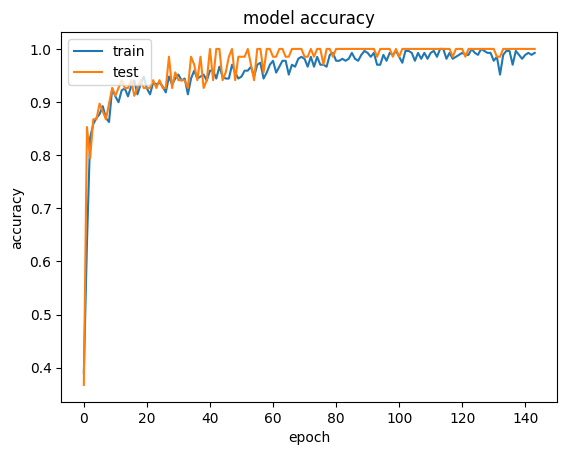

3/3 [==============================] - 1s 80ms/step


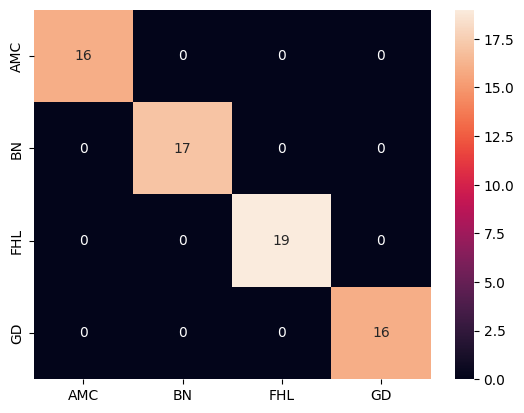

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        16

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [ ]:
X_train = train_df.drop(['outcome'], axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop(['outcome'], axis = 1)
y_test = test_df['outcome']

#Label-encode y
le = preprocessing.LabelEncoder()
y_train_enc = le.fit_transform(y_train)
#One-hot encoding
y_train_list = []
for item in y_train_enc:
  zer = np.zeros(4)
  zer[item] = 1
  y_train_list.append(zer)

y_train = np.array(y_train_list)

#Label-encode y
y_test_enc = le.fit_transform(y_test)
#One-hot encoding
y_test_list = []
for item in y_test_enc:
  zer = np.zeros(4)
  zer[item] = 1
  y_test_list.append(zer)

y_test = np.array(y_test_list)

try:
  input_tensor = Input(shape=(X_train.shape[1], 1))

  x = layers.Conv1D(128, 2, 2, activation='LeakyReLU')(input_tensor)
  x = layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'same')(x)
  x = layers.BatchNormalization(momentum=0.80, epsilon=0.001) (x)
  x = layers.Flatten()(x)
  x = Dense(512, activation='relu')(x)
  out = Dense(4, activation='softmax')(x)
  name = keras.Model(inputs=[input_tensor], outputs=[out])
  opt = Adam(learning_rate=1E-4, use_ema=True, ema_momentum=0.99)

  name.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


  history = name.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 50,
                          callbacks=[es])
except:
  input_tensor = Input(shape=(X_train.shape[1], 1))

  x = layers.Conv1D(128, 1, 1, activation='LeakyReLU')(input_tensor)
  x = layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'same')(x)
  x = layers.BatchNormalization(momentum=0.80, epsilon=0.001) (x)
  x = layers.Flatten()(x)
  x = Dense(512, activation='relu')(x)
  out = Dense(4, activation='softmax')(x)
  name = keras.Model(inputs=[input_tensor], outputs=[out])
  opt = Adam(learning_rate=1E-4, use_ema=True, ema_momentum=0.99)

  name.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


  history = name.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 50,
                          callbacks=[es])

print('CNN Classification Metrics: ', str(name))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = name.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))
DetaFrame_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['AMC', 'BN', 'FHL', 'GD'], xticklabels=['AMC', 'BN', 'FHL', 'GD'])
plt.show()

print(classification_report(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1))))

In [ ]:
def grad_cam(layer_name, data):
    grad_model = tf.keras.models.Model([name.inputs], [name.get_layer(layer_name).output, name.output])
    last_conv_layer_output, preds = grad_model(data)

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)


    pooled_grads = tf.reduce_mean(grads, axis=(0))


    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output * pooled_grads
    heatmap = tf.reduce_mean(heatmap, axis=(1))
    heatmap = np.expand_dims(heatmap,0)
    return heatmap

#Generating visualizations for test set and appending to heatmap

X = train_df.drop('outcome', axis = 1)
y = train_df['outcome']

layer_name = "conv1d"
label = [0, 1, 2, 3]
heatmap_list = []
heatmaps_dict = {}
i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
    data = np.expand_dims(i,0)
    heatmap = grad_cam(layer_name, data)
    heatmap_list.append(heatmap)
    if clas in heatmaps_dict.keys():
      heatmaps_dict[clas].append(heatmap)
    else:
      heatmaps_dict[clas] = [heatmap]
    if clas in i_dict.keys():
      i_dict[clas].append(i)
    else:
      i_dict[clas] = [i]

In [ ]:
r = 728
#Create average heatmap per class
#Average per class]
wave = train_df.columns
w_names = [float(x) for x in wave[:-1]]
average_heatmap = {}
for key, value in heatmaps_dict.items():
  average_heatmap[key] = np.mean(heatmaps_dict[key][0], axis=0)

In [ ]:
average_heatmap_final = {}
for key, value in average_heatmap.items():
  f = []
  for x in value:
    f.append(x)
    f.append(x)
  average_heatmap_final[key] = f

In [ ]:
coef_df = pd.DataFrame(average_heatmap_final)
coef_df.set_index(X_test.columns, inplace = True)

scaler = preprocessing.MinMaxScaler()
coef_df =  pd.DataFrame(scaler.fit_transform(coef_df), index = X_test.columns, columns = average_heatmap.keys())

full_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
full_df = full_df.replace({"outcome": dic})
all_cols = list(full_df.columns[:-1].values)

EC = {}
CSG1 = {}
CSG2 = {}
CSG3 = {}

for item in all_cols:
  if item in coef_df.index:
    EC[item] = coef_df['EC'][item]
    CSG1[item] = coef_df['CSG1'][item]
    CSG2[item] = coef_df['CSG2'][item]
    CSG3[item] = coef_df['CSG3'][item]
  else:
    EC[item] = 0
    CSG1[item] = 0
    CSG2[item] = 0
    CSG3[item] = 0

f = {'EC' : EC, 'CSG1' : CSG1, 'CSG2' : CSG2, 'CSG3' : CSG3}

final = pd.DataFrame(f, index = full_df.columns[:-1], columns = f.keys())

r = 1480
wave = full_df.columns
w_names = [float(x) for x in wave[:-1]]

X = full_df.drop(['outcome'], axis = 1)
y = full_df['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

scaled_average_i = {}
for key, value in average_i.items():
  mi = min(value)
  ma = max(value)
  di = ma - mi
  scaled_average_i[key] = [x / di for x in value]

total_i = np.mean(np.array(list(scaled_average_i.values())), axis = 0)
scaled_average_i['total'] = total_i
bars = range(0, r)
y_pos = r

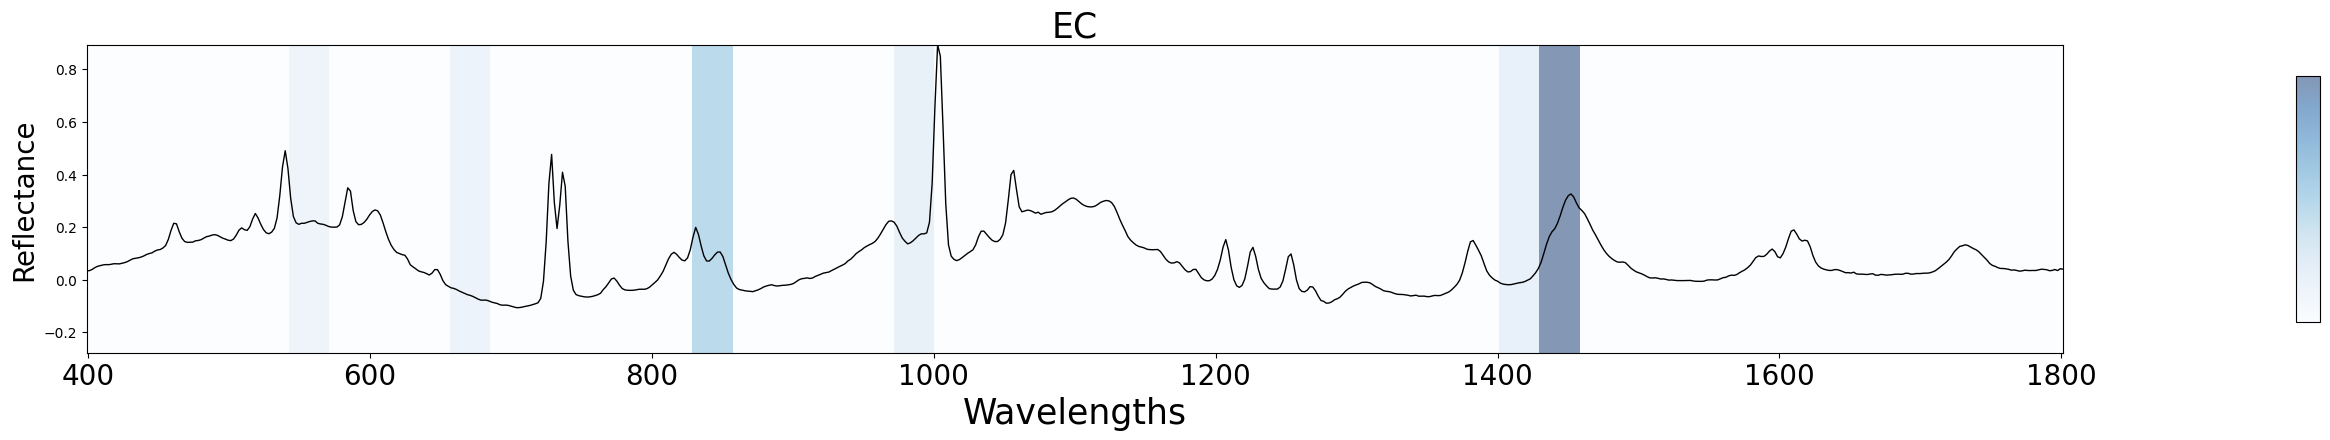

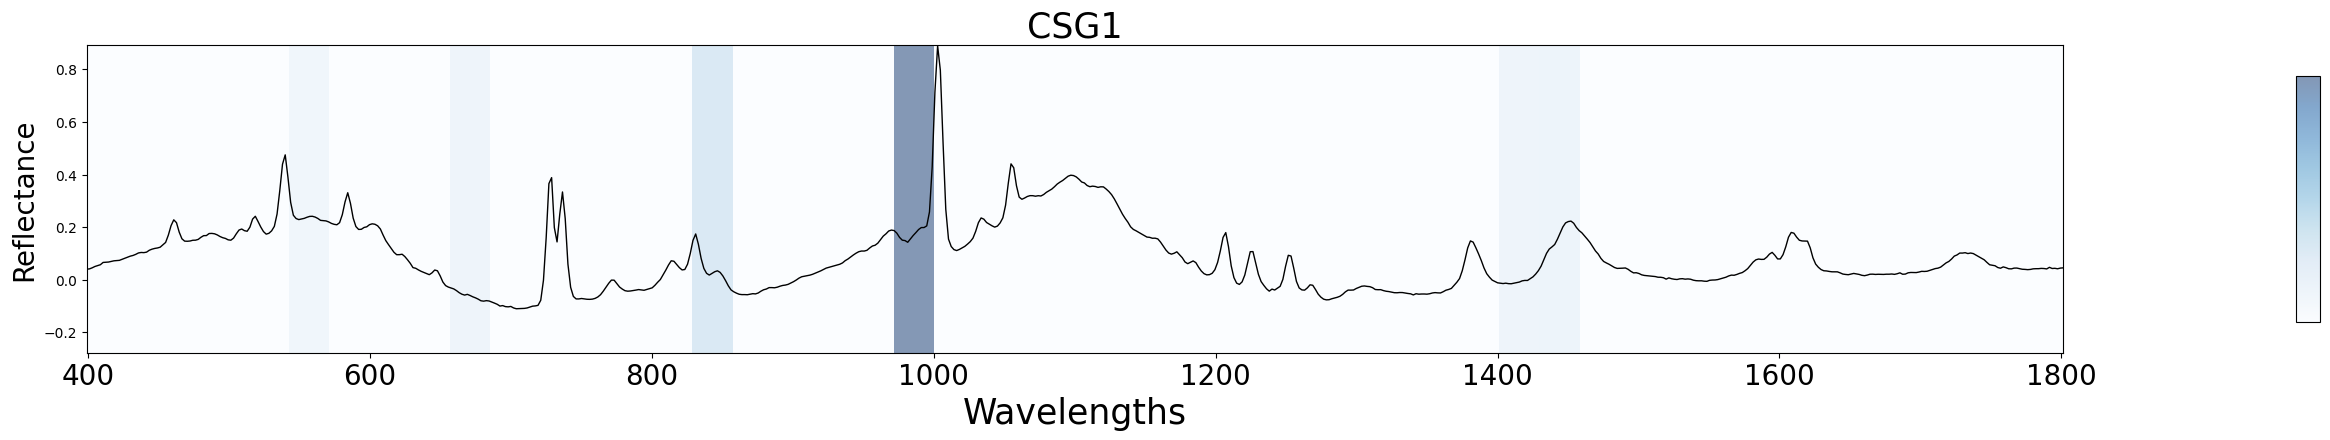

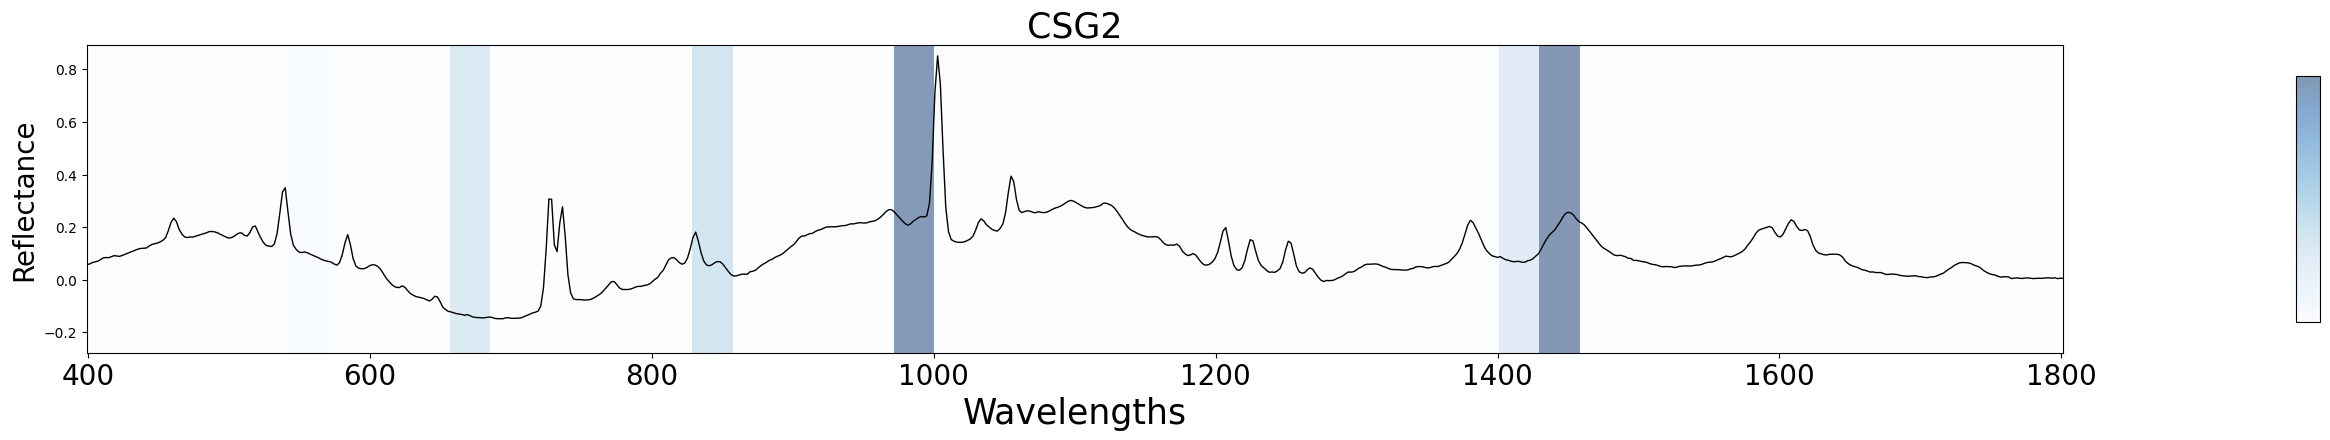

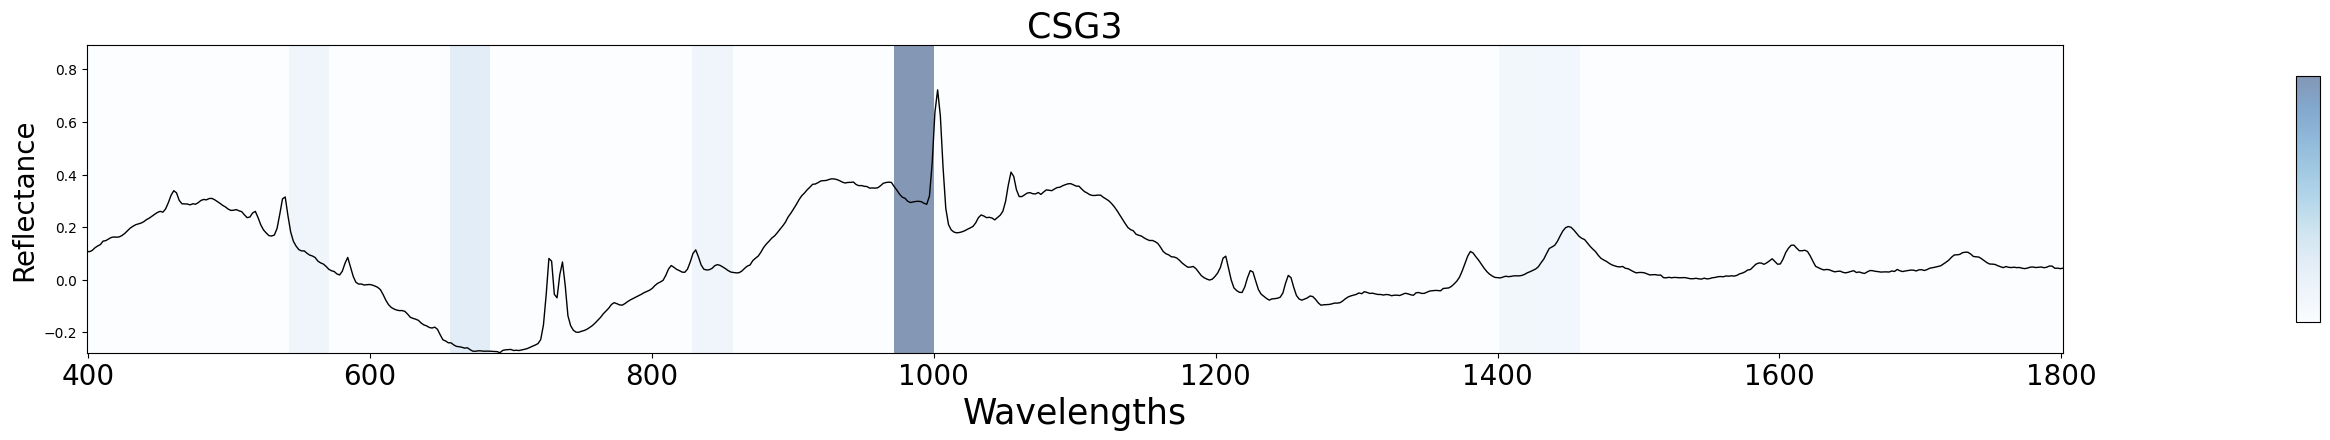

In [ ]:
fin = {'EC' : list(EC.values()), 'CSG1' : list(CSG1.values()), 'CSG2' : list(CSG2.values()), 'CSG3' : list(CSG3.values())}
binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in fin.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 49))
    binned_heatmapdict[key] = mapped_mean.tolist()[0]


fmin = []
fmax = []
for key, value in binned_heatmapdict.items():
  fmin.append(min(value))
  fmax.append(max(value))


#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue


for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

In [ ]:
#Create average heatmap per class
#Average per class]
wave = test_df.columns
w_names = [float(x) for x in wave[:-1]]
average_heatmap = {}
for key, value in heatmaps_dict.items():
  average_heatmap[key] = np.mean(heatmaps_dict[key], axis=0)


total_av = np.mean(list(average_heatmap.values()), axis=0)
average_heatmap['total'] = total_av

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

#Create dict for current scale values and corresponding Wavelengths
x_axis_dict = { k:v for (k,v) in zip((range(0,728)), list(test_df.columns))}

#Save total as csv for use in feature selection
heat = pd.DataFrame()
AMC_list = []
BN_list = []
FHL_list = []
GD_list = []
total_list = []
for item in average_heatmap['EC'][0]:
  AMC_list.append(item)
  AMC_list.append(item)

for item in average_heatmap['CSG1'][0]:
  BN_list.append(item)
  BN_list.append(item)

for item in average_heatmap['CSG2'][0]:
  FHL_list.append(item)
  FHL_list.append(item)

for item in average_heatmap['CSG3'][0]:
  GD_list.append(item)
  GD_list.append(item)

for item in average_heatmap['total'][0]:
  total_list.append(item)
  total_list.append(item)

heat['EC'] = AMC_list
heat['CSG1'] = BN_list
heat['CSG2'] = FHL_list
heat['CSG3'] = GD_list
heat['total'] = total_list

#heat.to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Heatmap_CNN_95_fil_5.csv')

#heat['total'].to_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Heatmap_total_CNN_95_fil_5.csv')

In [ ]:
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)
df_curv = df_curve.drop('outcome', axis = 1)
X_train = train_df.drop('outcome', axis = 1)

fin_heat = {}

full_df_col = [x for x in df_curve.columns]
feat_sel_col = [x for x in X_train.columns]

for key, value in heat.items():
  kv = {}
  for val, col in zip(value, feat_sel_col):
    kv[col] = val
  fin_heat[key] = kv

fin = {}
for key, value in fin_heat.items():
  f = []
  for x in full_df_col:
    if x in value.keys():
      f.append(value[x])
      f.append(value[x])
    else:
      f.append(-0.003)
  fin[key] = f

In [ ]:
#df_heat = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Heatmap_CNN_95.csv', index_col = 0)
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)


wave = df_curve.columns
w_names = [float(x) for x in wave[:-1]]

X = df_curve.drop('outcome', axis = 1)
y = df_curve['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

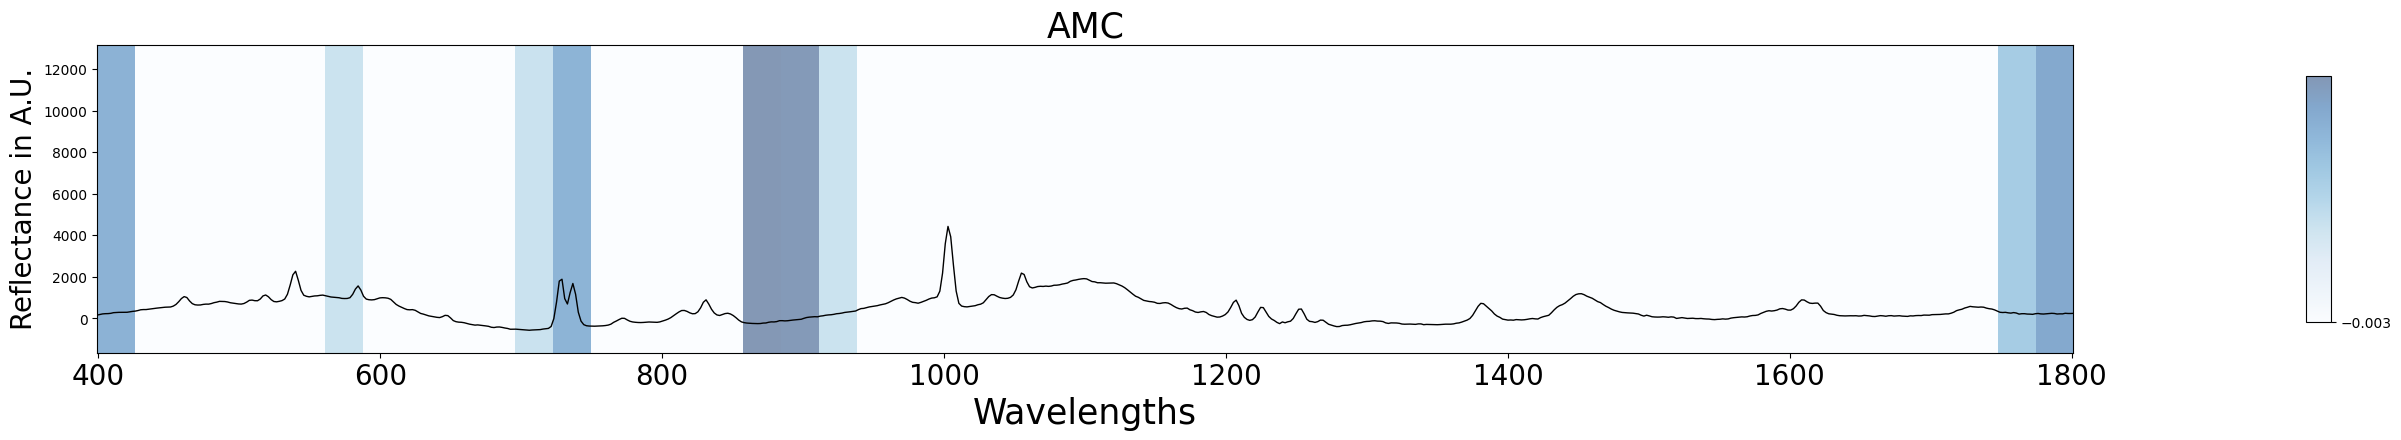

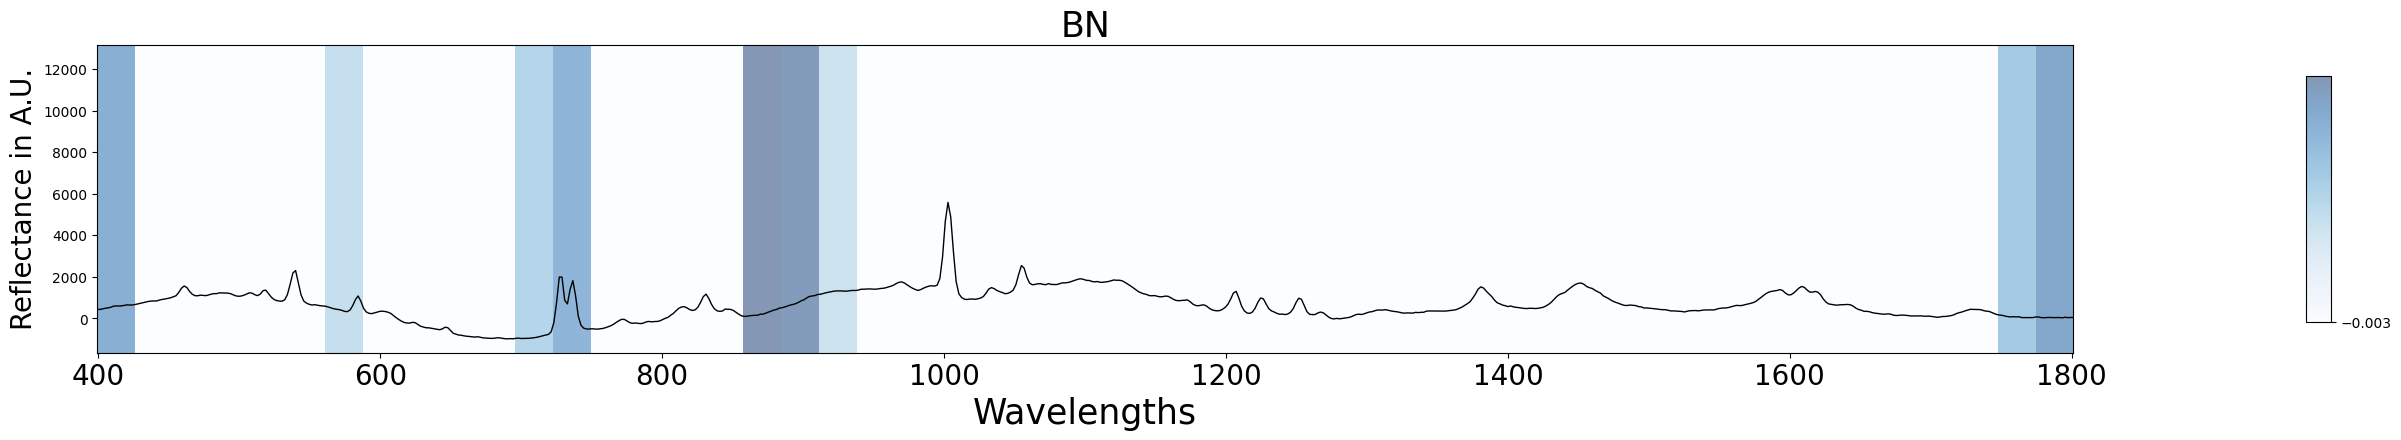

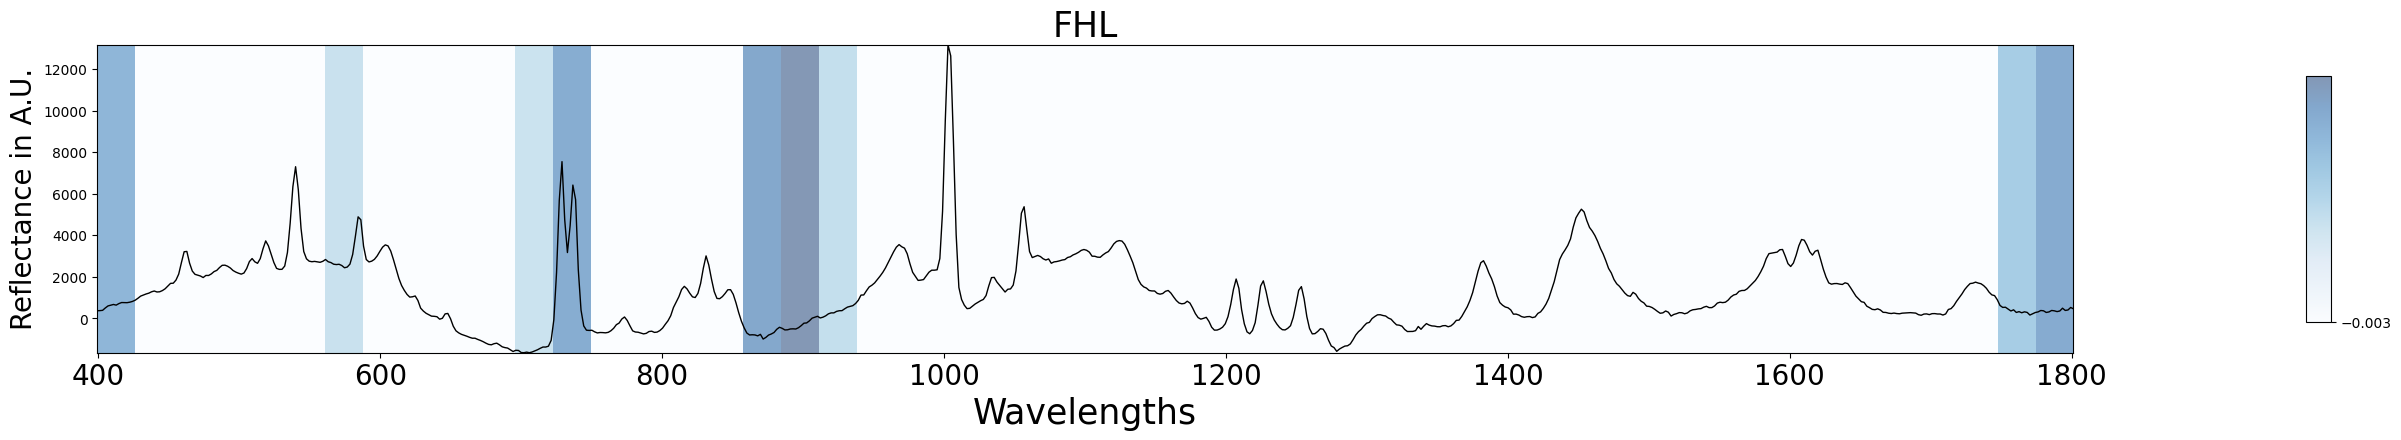

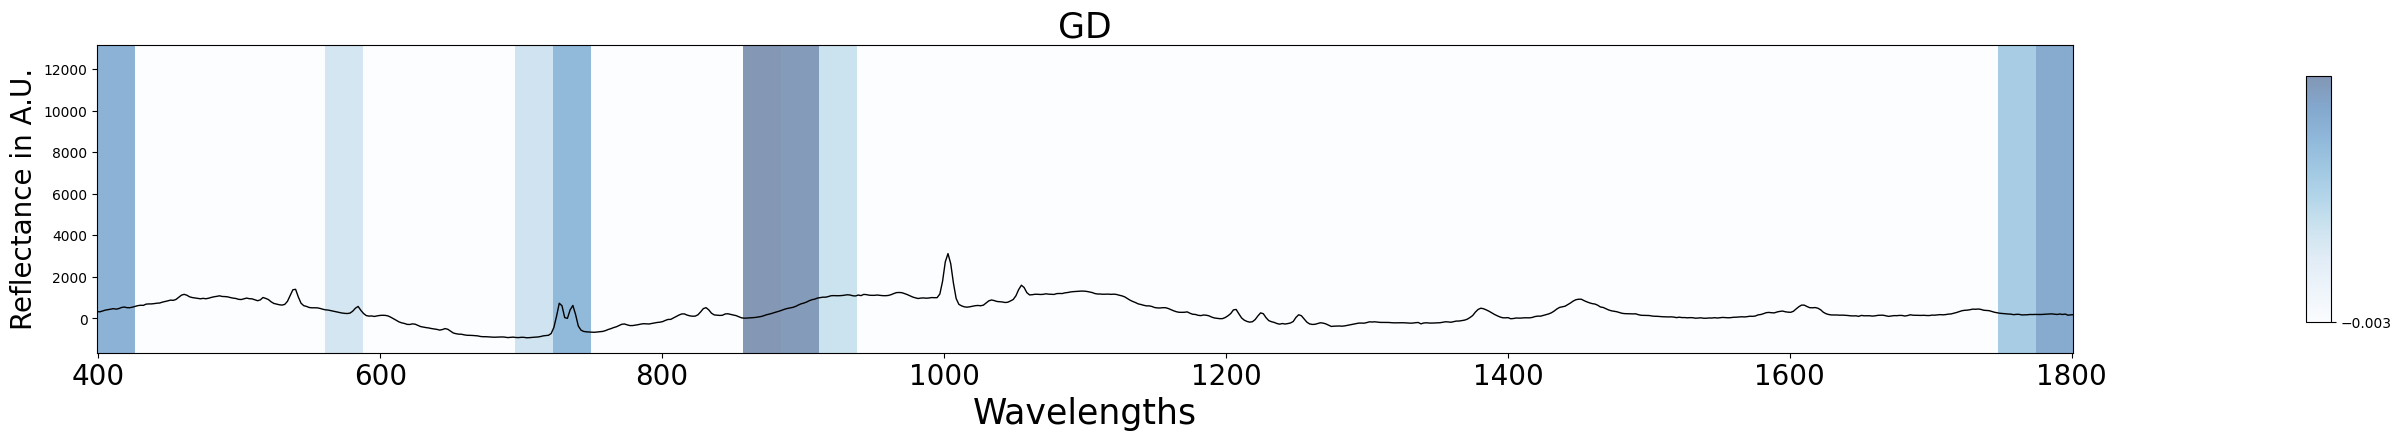

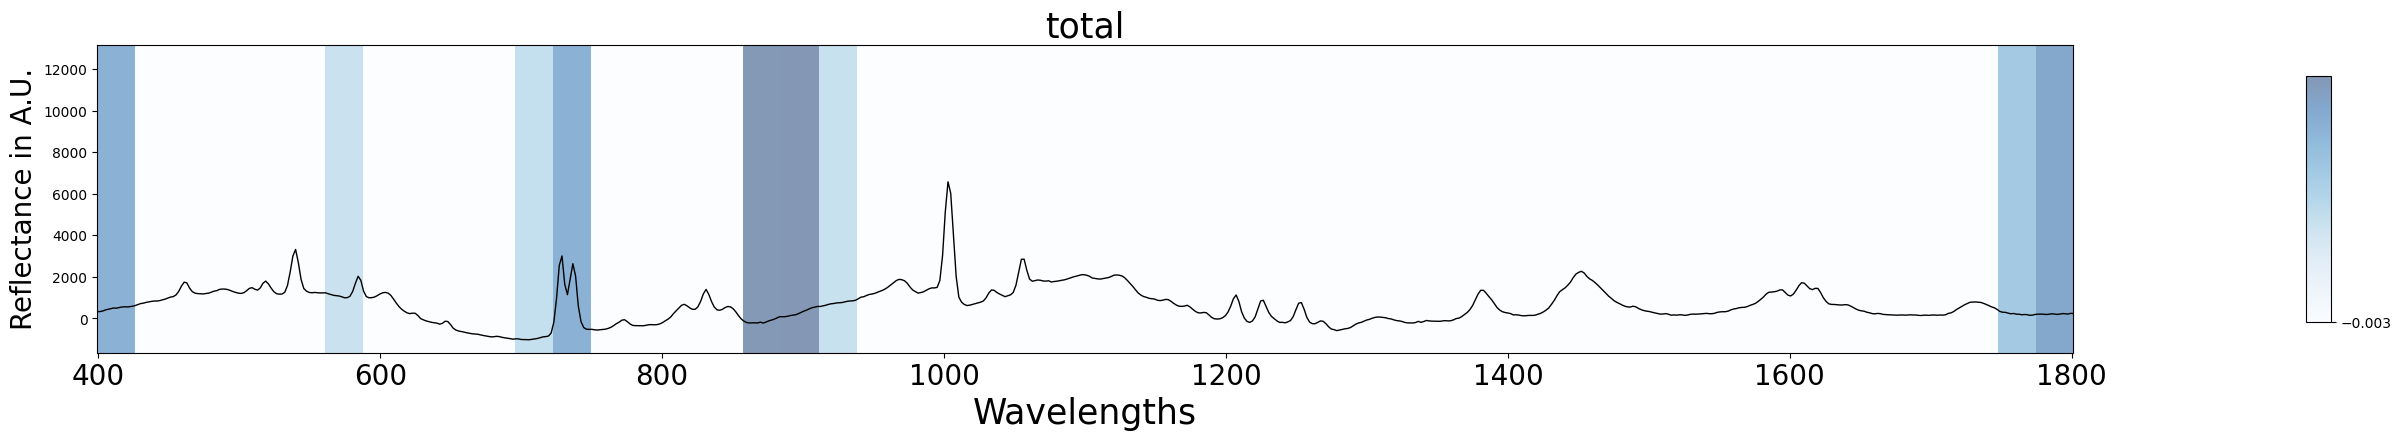

In [ ]:
binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in fin.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 52))
    binned_heatmapdict[key] = mapped_mean

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-0.003, 0.003])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

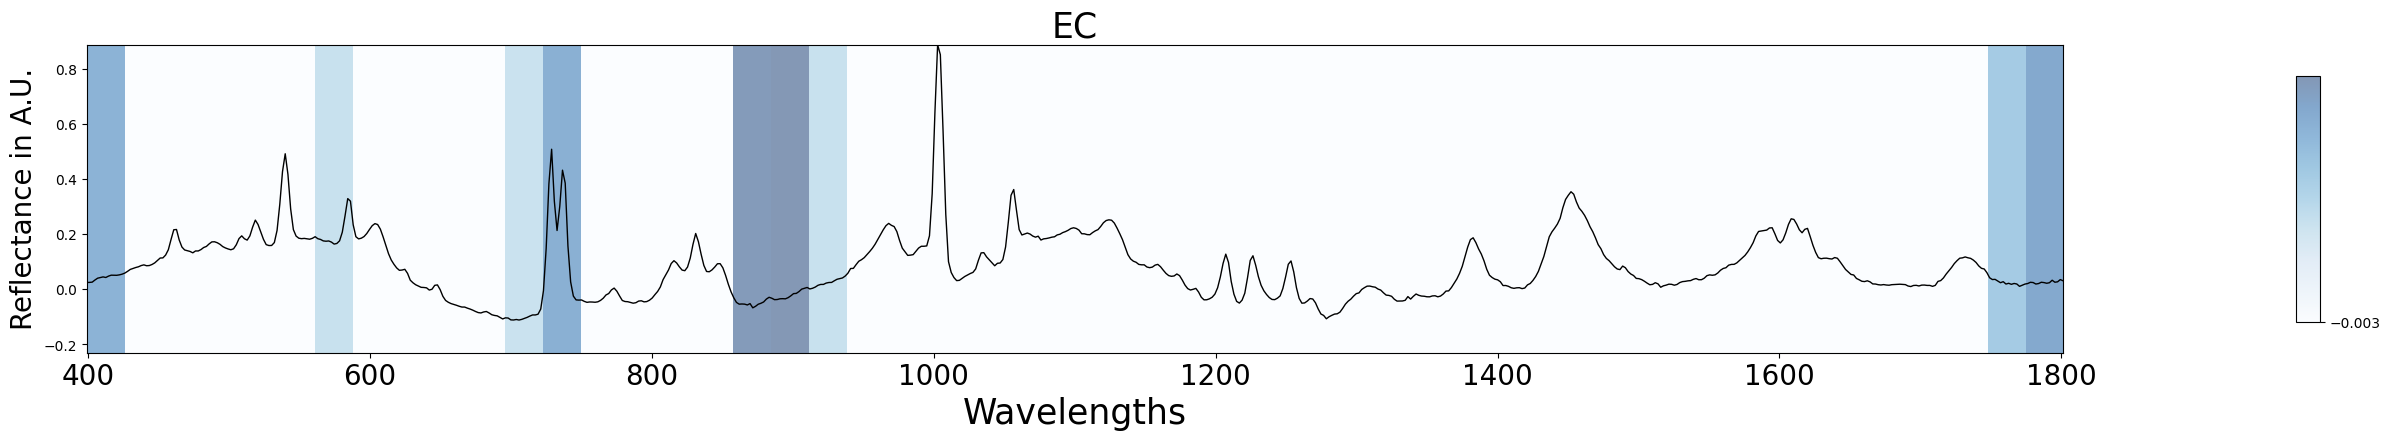

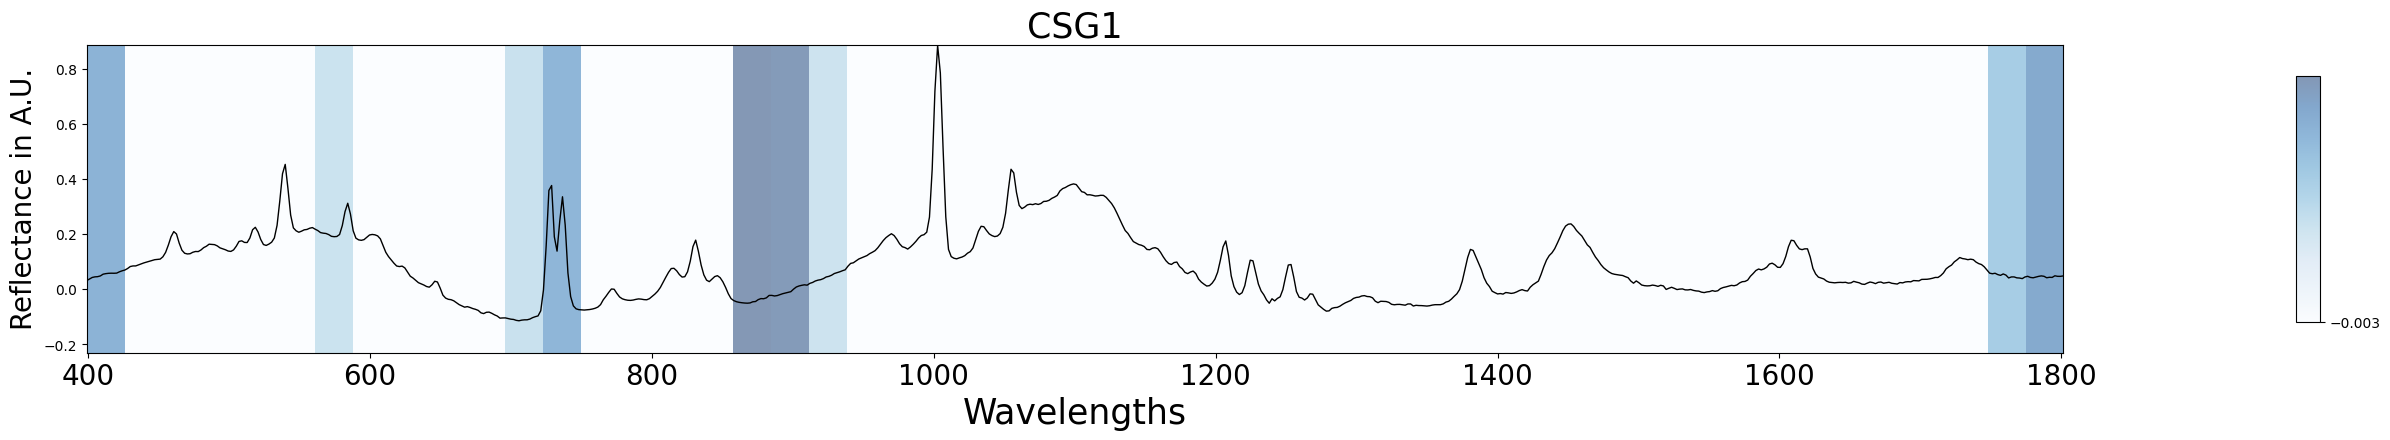

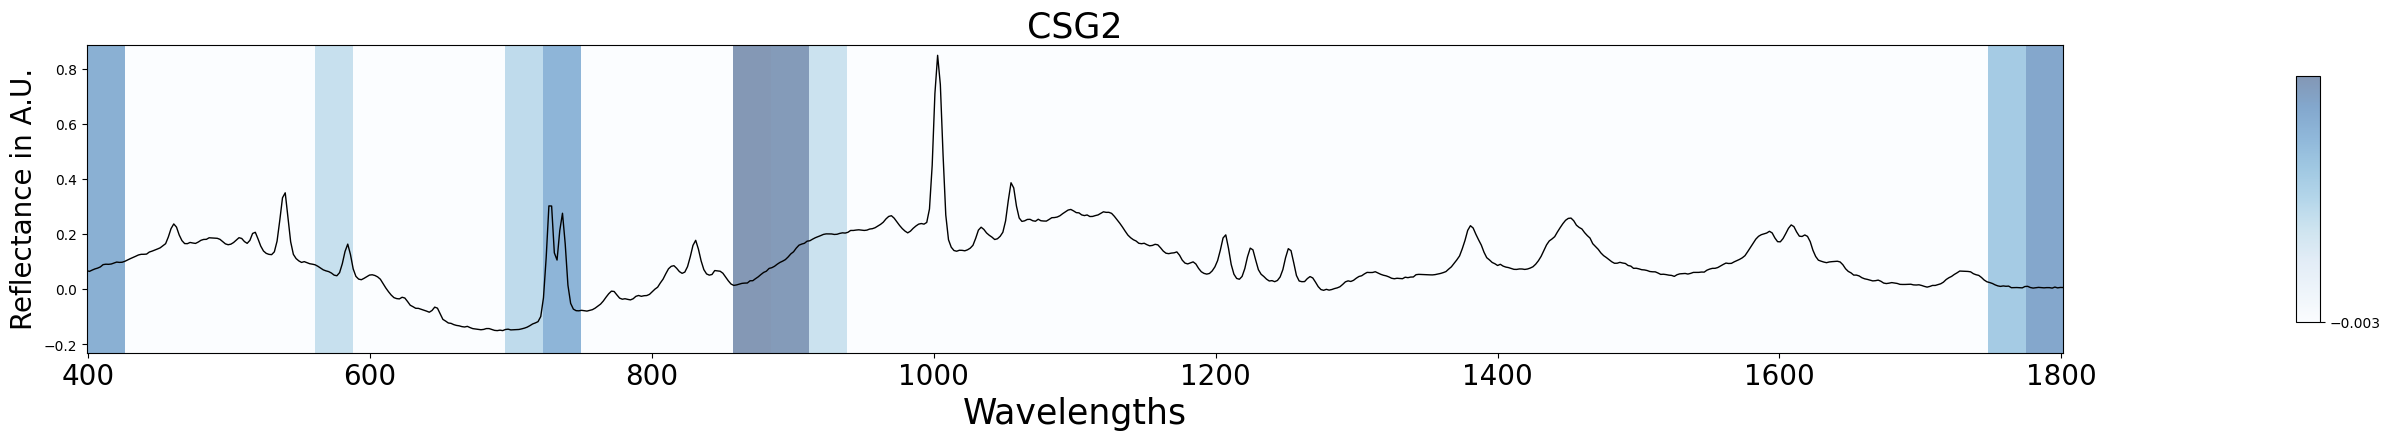

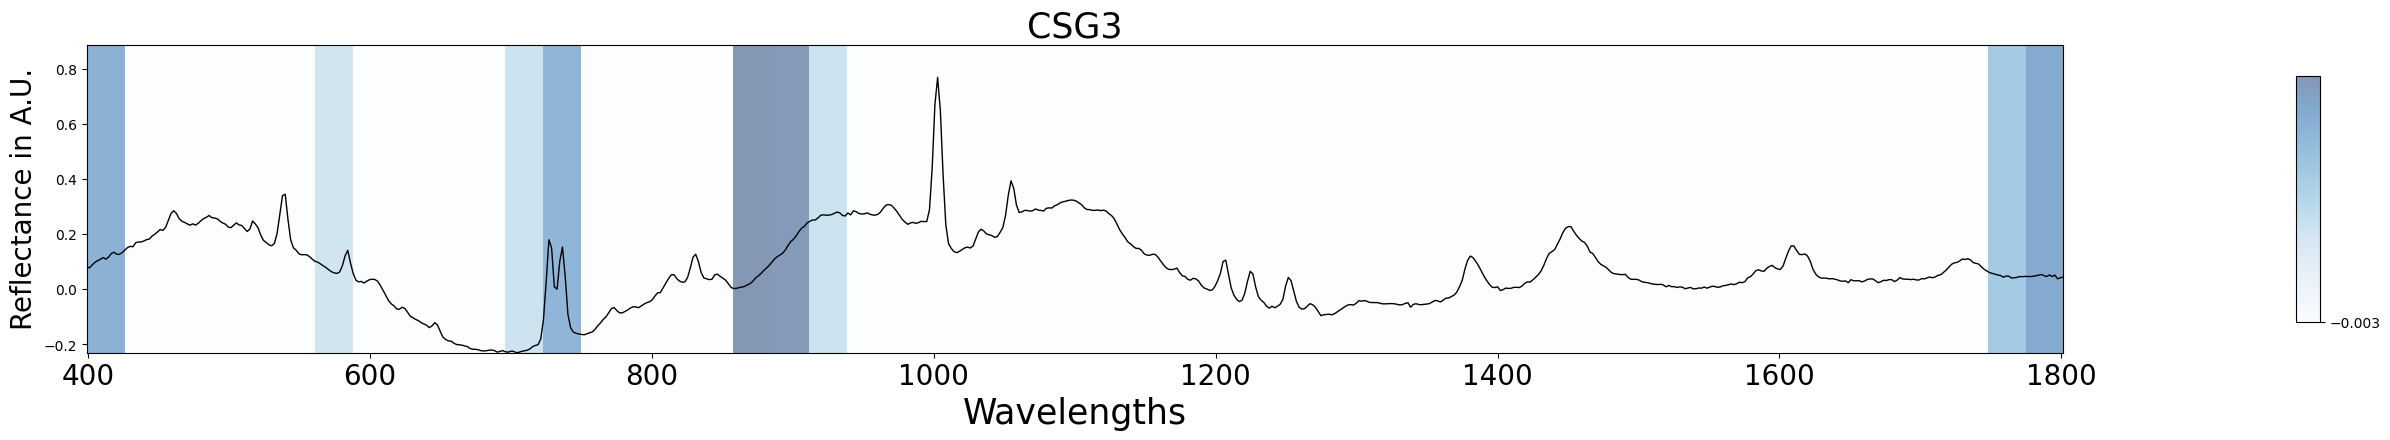

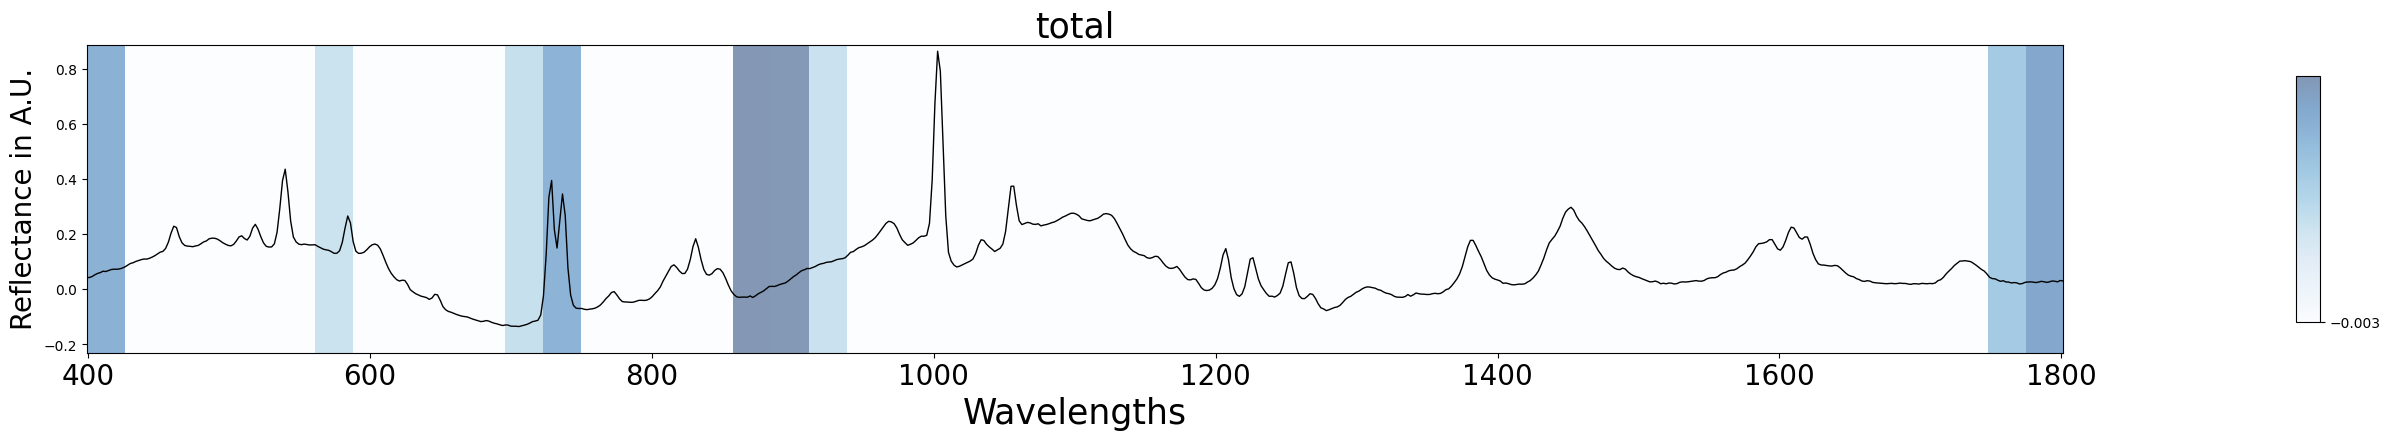

In [ ]:
#Getting Scaled heatmaps
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
df_curve = df_curve.replace({"outcome": dic})

wave = df_curve.columns
w_names = [float(x) for x in wave[:-1]]

X = df_curve.drop('outcome', axis = 1)
y = df_curve['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

scaled_average_i = {}
for key, value in average_i.items():
  mi = min(value)
  ma = max(value)
  di = ma - mi
  scaled_average_i[key] = [x / di for x in value]

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in fin.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 52))
    binned_heatmapdict[key] = mapped_mean

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-0.003, 0.003])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

In [ ]:
ins_EC = heatmaps_dict['EC'][0]
ins_CSG1 = heatmaps_dict['CSG1'][0]
ins_CSG2 = heatmaps_dict['CSG2'][0]
ins_CSG3 = heatmaps_dict['CSG3'][0]

In [ ]:
instance_heatmap = {}
instance_heatmap['EC'] = []
instance_heatmap['CSG1'] = []
instance_heatmap['CSG2'] = []
instance_heatmap['CSG3'] = []

for item in ins_EC[0]:
  instance_heatmap['EC'].append(item)
  instance_heatmap['EC'].append(item)

for item in ins_CSG1[0]:
  instance_heatmap['CSG1'].append(item)
  instance_heatmap['CSG1'].append(item)

for item in ins_CSG2[0]:
  instance_heatmap['CSG2'].append(item)
  instance_heatmap['CSG2'].append(item)

for item in ins_CSG3[0]:
  instance_heatmap['CSG3'].append(item)
  instance_heatmap['CSG3'].append(item)

In [ ]:
min_list = []
max_list = []

for key, value in instance_heatmap.items():
  min_list.append(min(value))
  max_list.append(max(value))

min_val = min(min_list)
max_val = max(max_list)

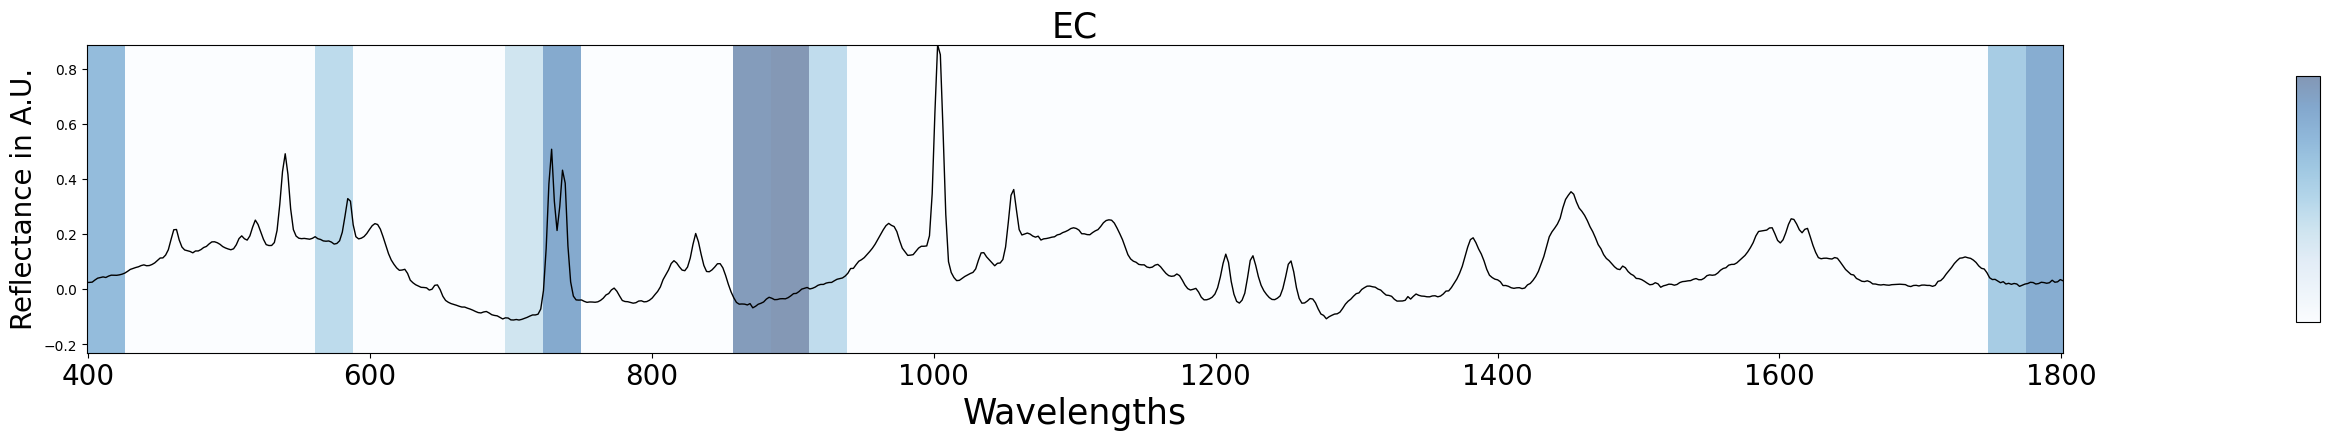

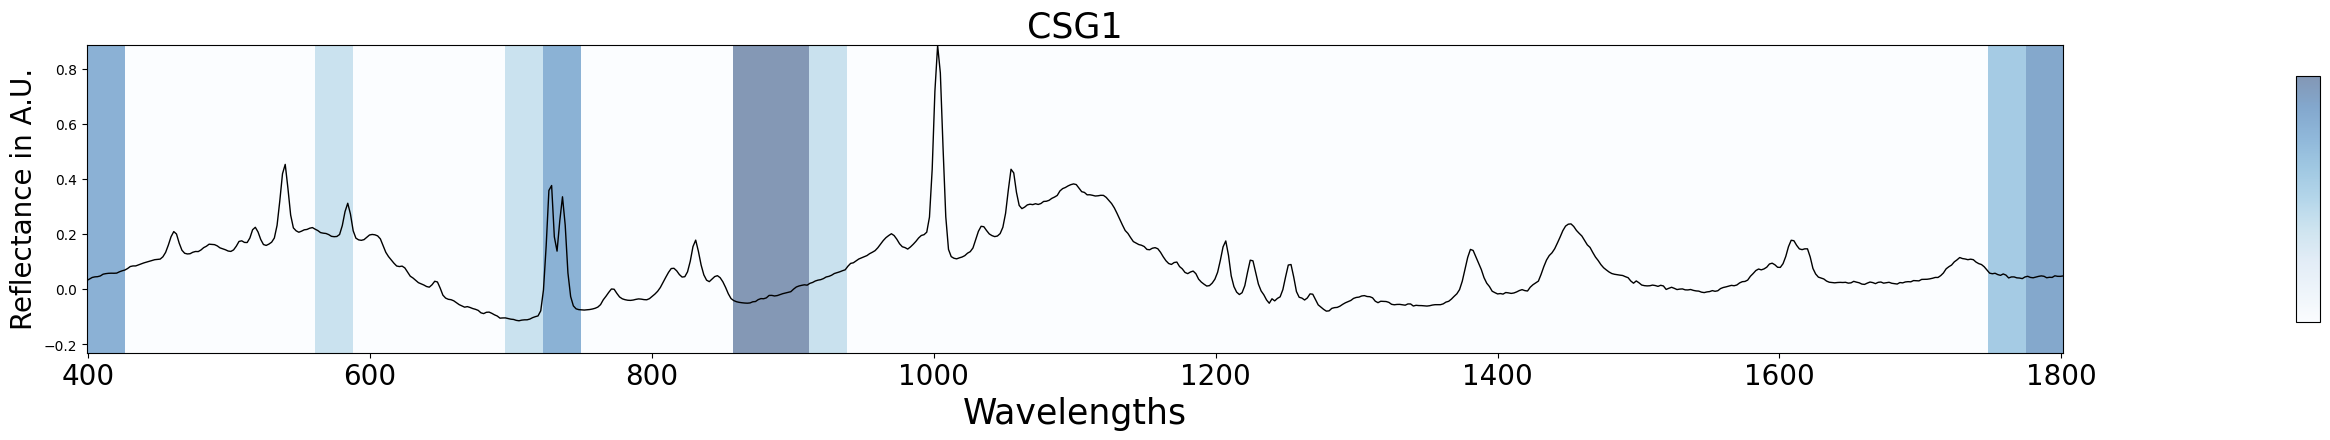

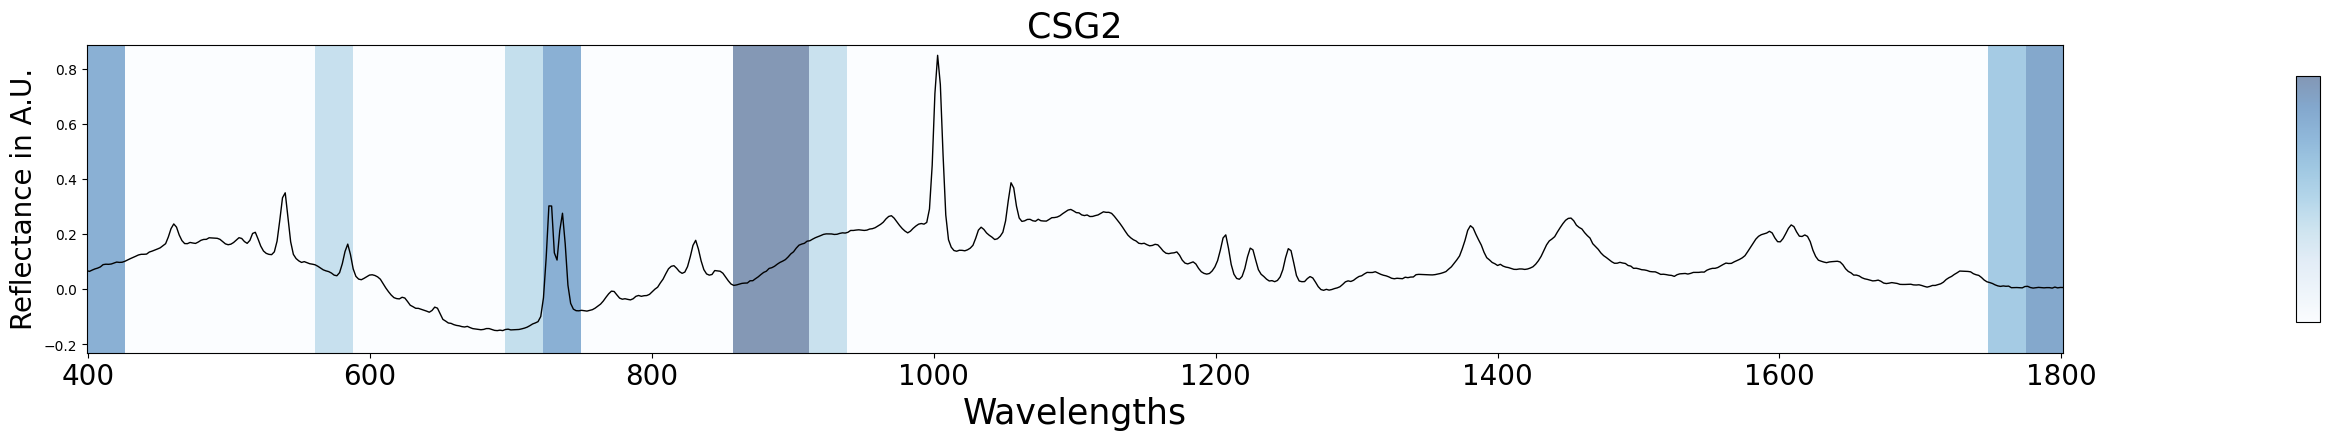

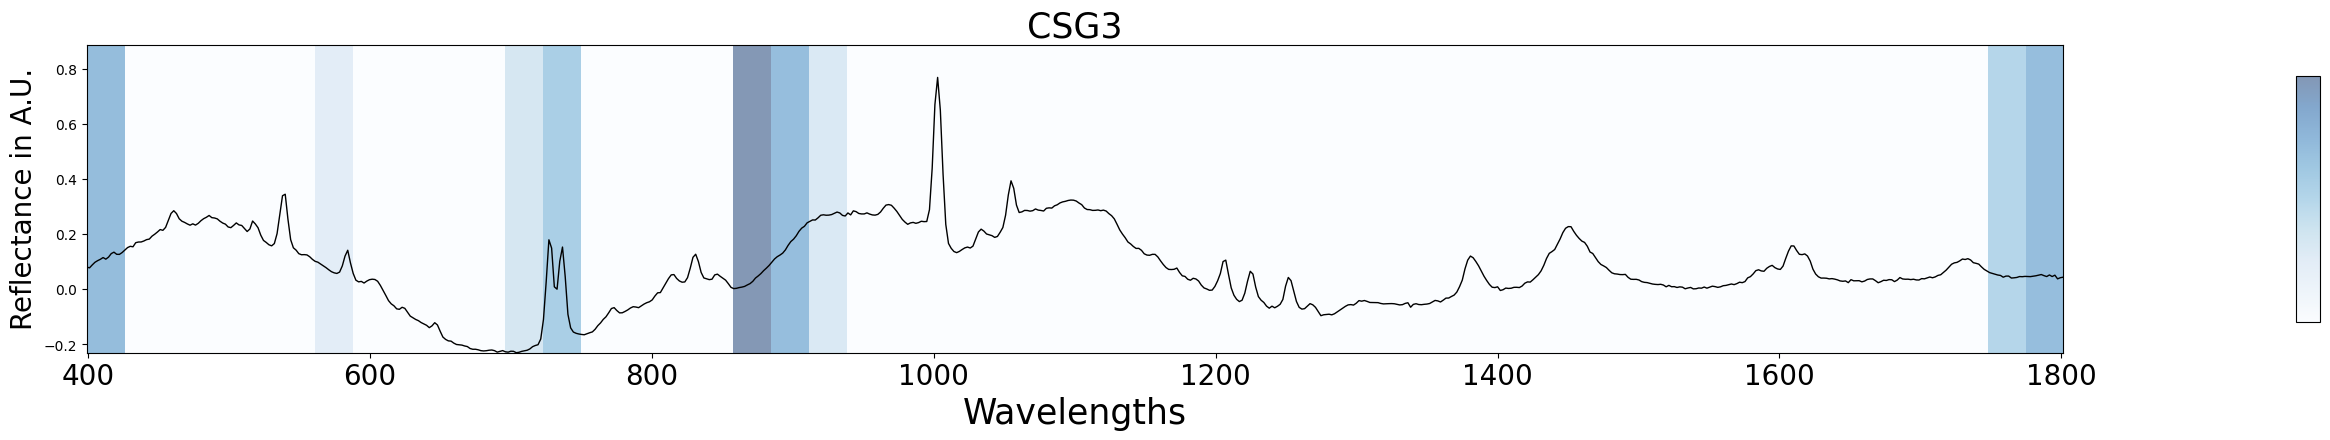

In [ ]:
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
df_curve = df_curve.replace({"outcome": dic})

df_curv = df_curve.drop('outcome', axis = 1)
X_train = train_df.drop('outcome', axis = 1)

fin_heat = {}

full_df_col = [x for x in df_curve.columns]
feat_sel_col = [x for x in X_train.columns]

for key, value in instance_heatmap.items():
  kv = {}
  for val, col in zip(value, feat_sel_col):
    kv[col] = val
  fin_heat[key] = kv

fin = {}
for key, value in fin_heat.items():
  f = []
  for x in full_df_col:
    if x in value.keys():
      f.append(value[x])
      f.append(value[x])
    else:
      f.append(-0.0002)
  fin[key] = f

df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
df_curve = df_curve.replace({"outcome": dic})

wave = df_curve.columns
w_names = [float(x) for x in wave[:-1]]

X = df_curve.drop('outcome', axis = 1)
y = df_curve['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728


scaled_average_i = {}
for key, value in average_i.items():
  mi = min(value)
  ma = max(value)
  di = ma - mi
  scaled_average_i[key] = [x / di for x in value]

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in fin.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 52))
    binned_heatmapdict[key] = mapped_mean

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-0.003, 0.003])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

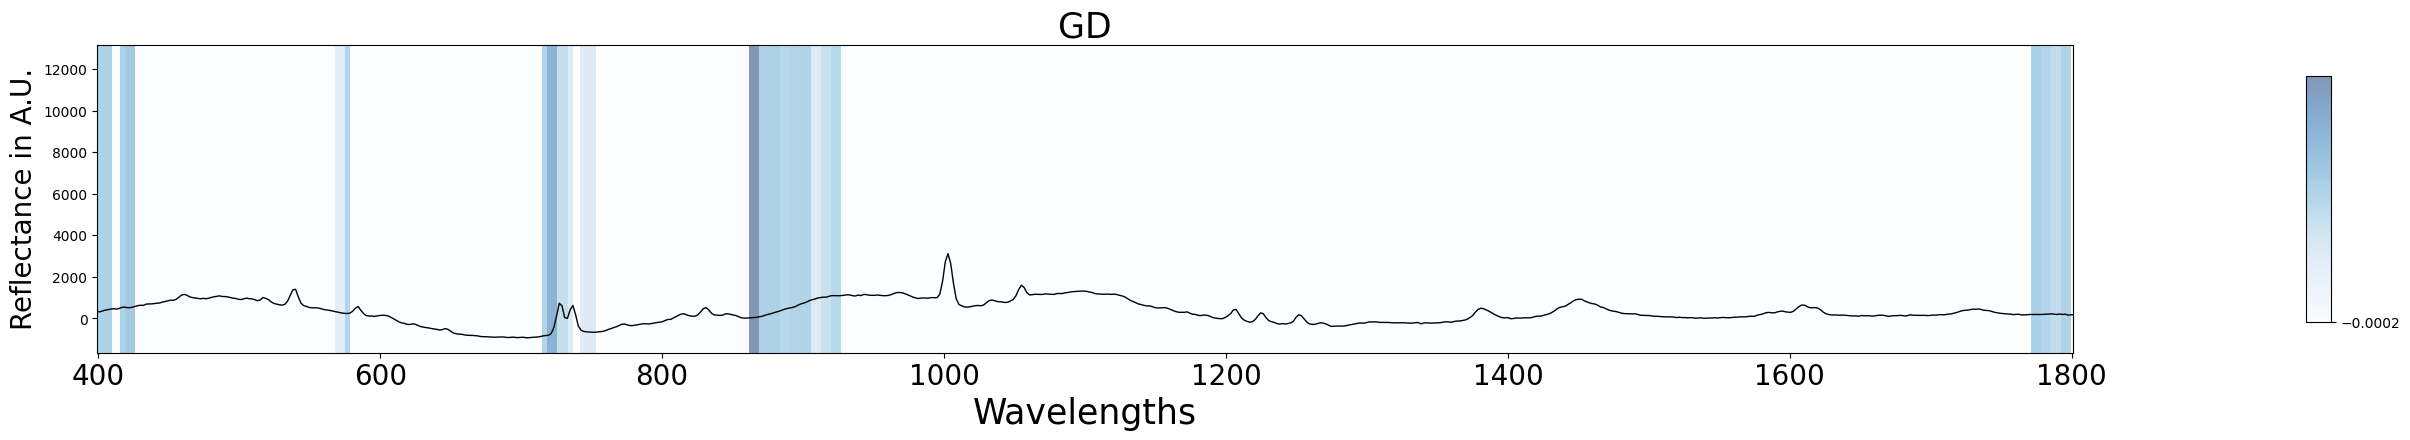

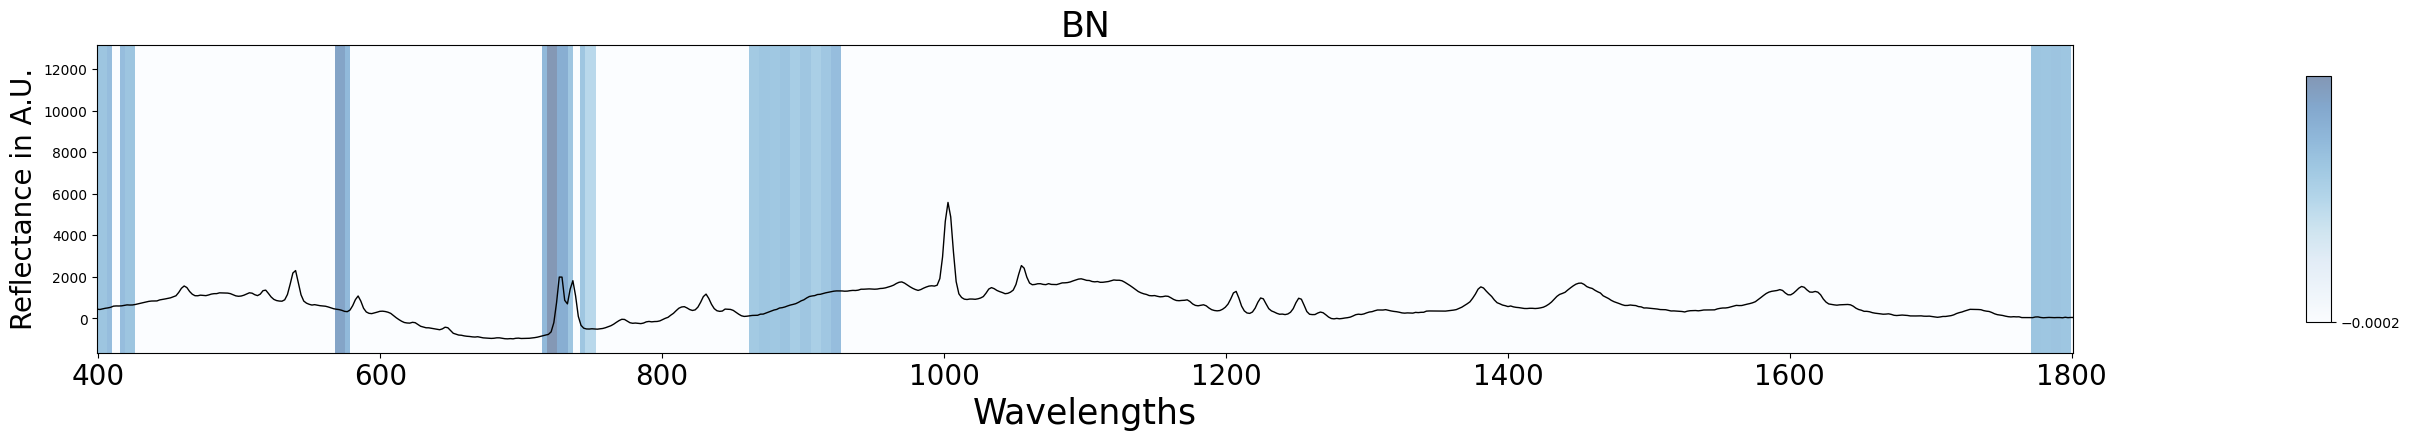

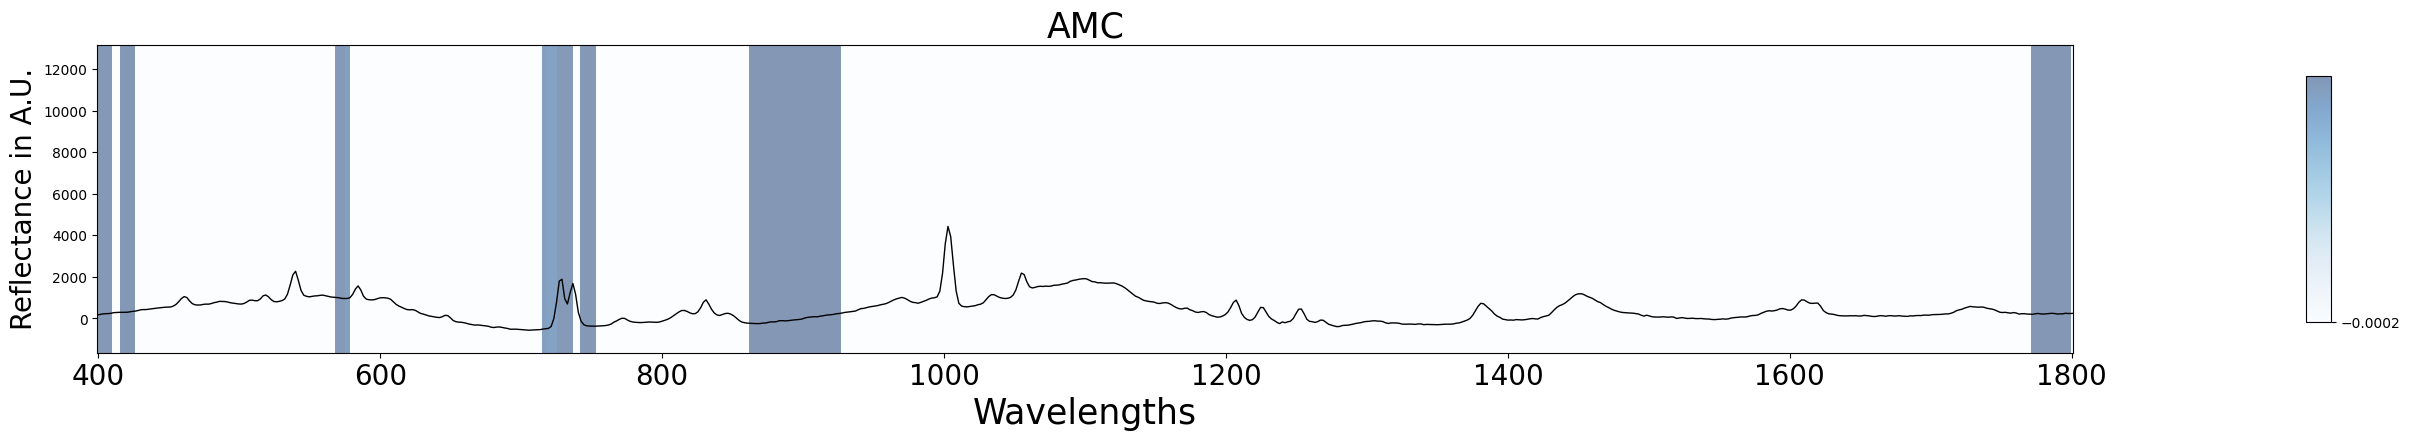

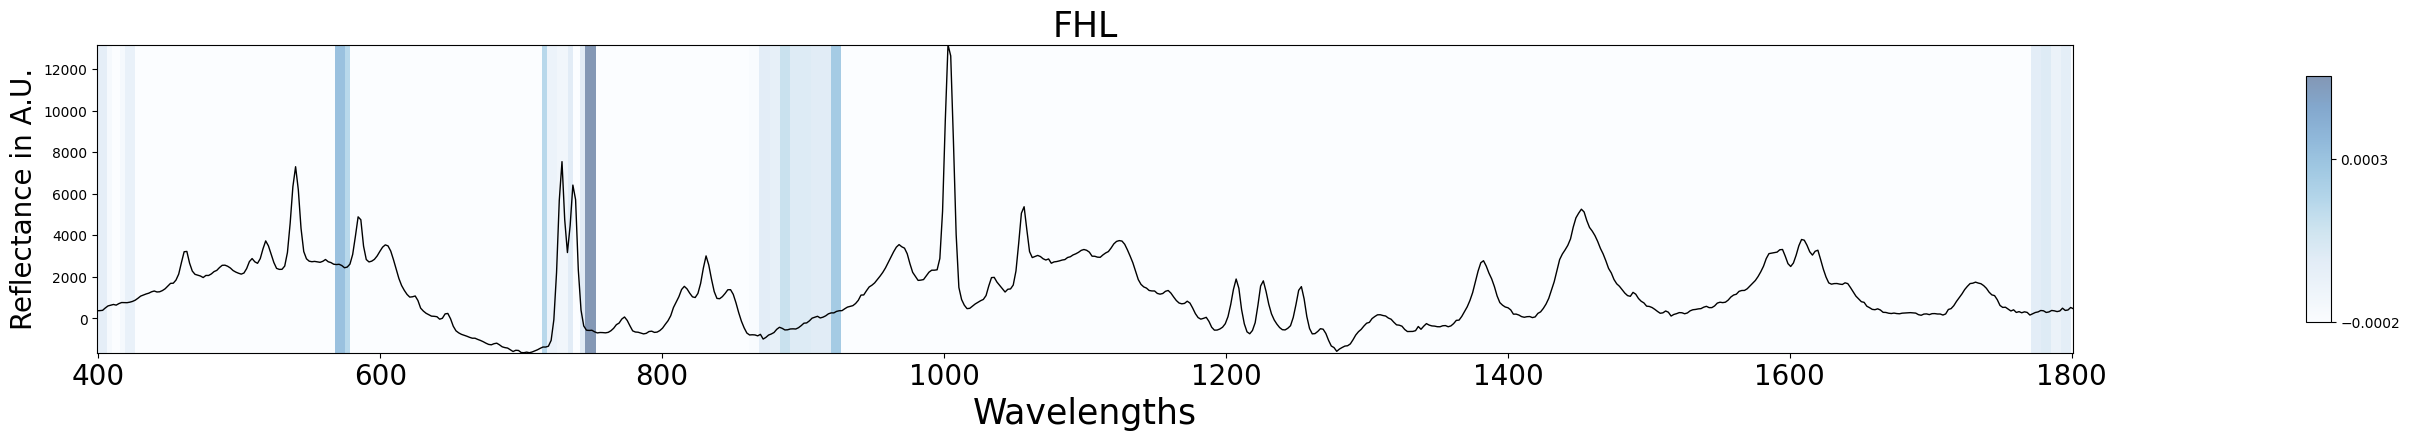

In [ ]:
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)
df_curv = df_curve.drop('outcome', axis = 1)
X_train = train_df.drop('outcome', axis = 1)

fin_heat = {}

full_df_col = [x for x in df_curve.columns]
feat_sel_col = [x for x in X_train.columns]

for key, value in instance_heatmap.items():
  kv = {}
  for val, col in zip(value, feat_sel_col):
    kv[col] = val
  fin_heat[key] = kv

fin = {}
for key, value in fin_heat.items():
  f = []
  for x in full_df_col:
    if x in value.keys():
      f.append(value[x])
      f.append(value[x])
    else:
      f.append(-0.0002)
  fin[key] = f

df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)


wave = df_curve.columns
w_names = [float(x) for x in wave[:-1]]

X = df_curve.drop('outcome', axis = 1)
y = df_curve['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728



#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(fin.keys(), fin.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-0.0002, 0.0003])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

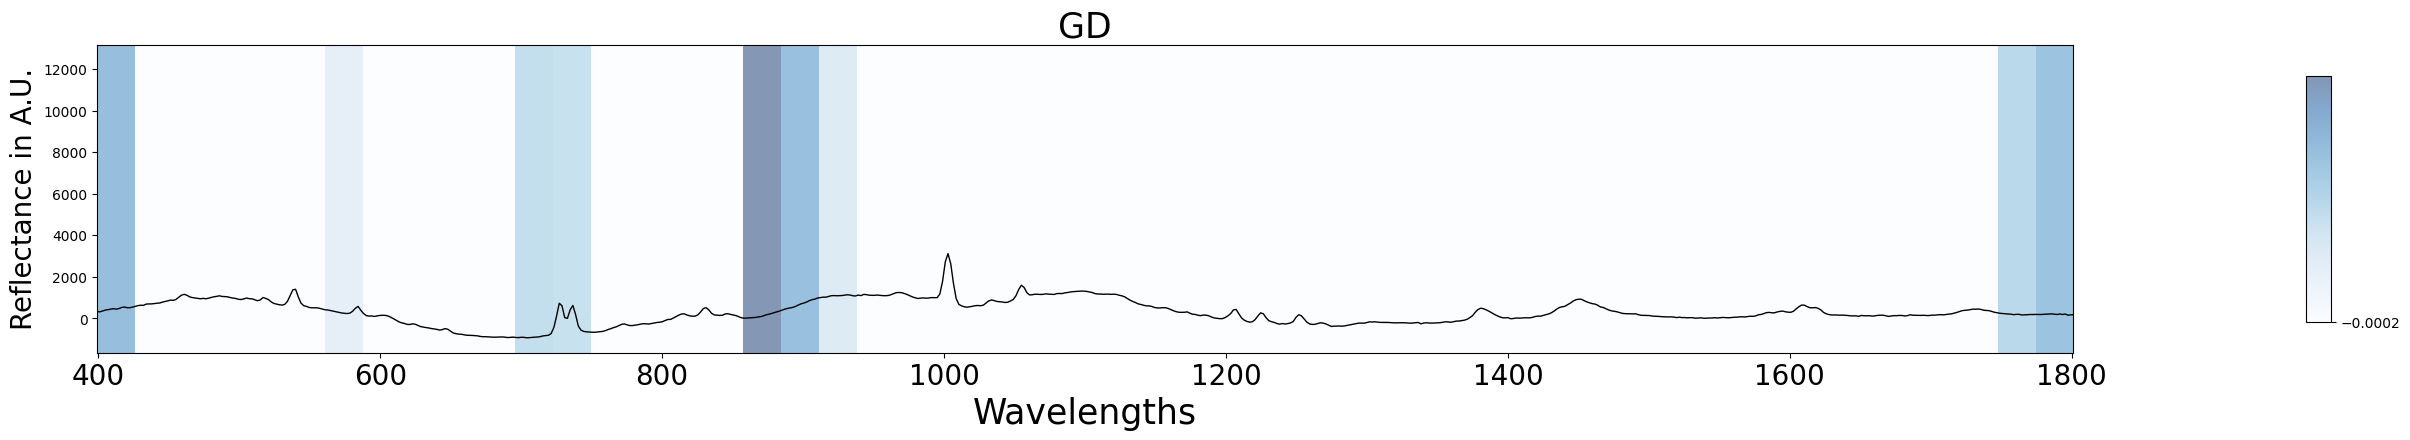

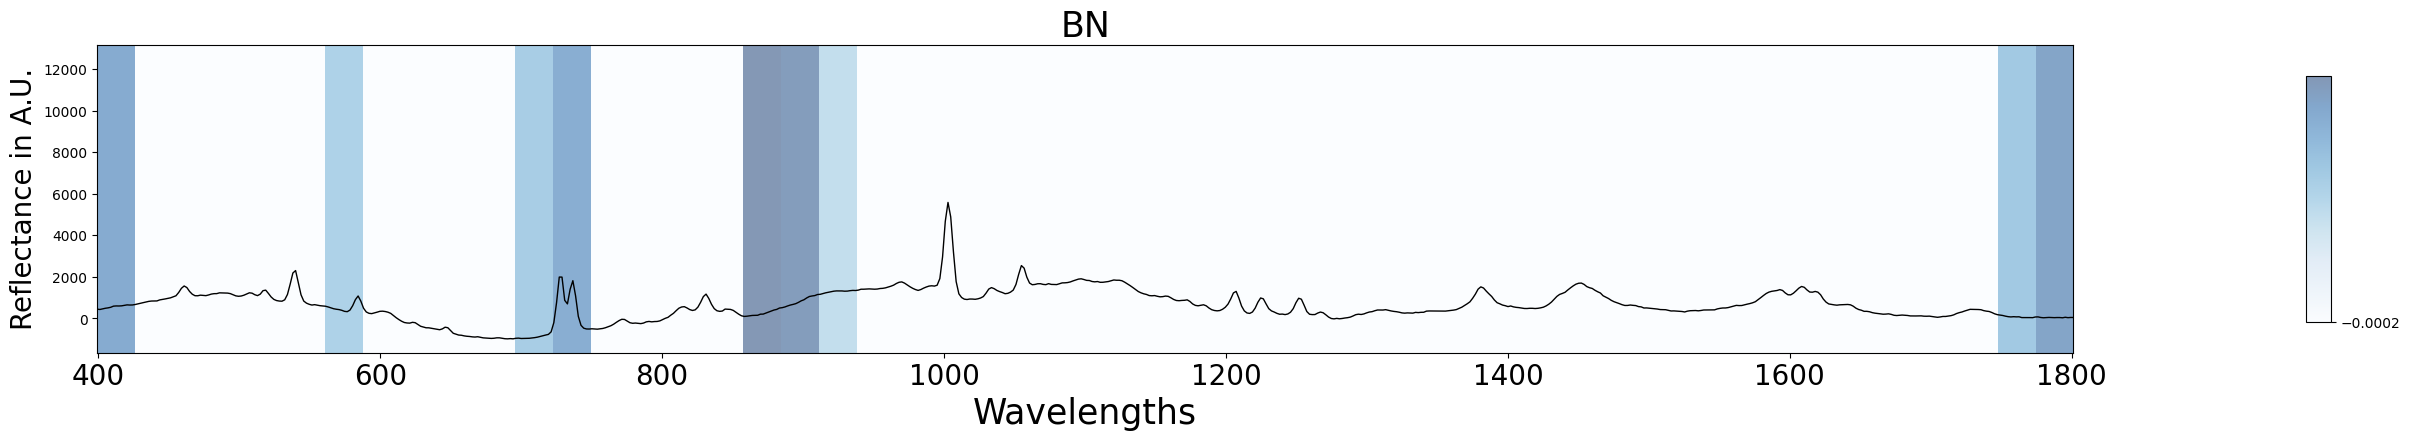

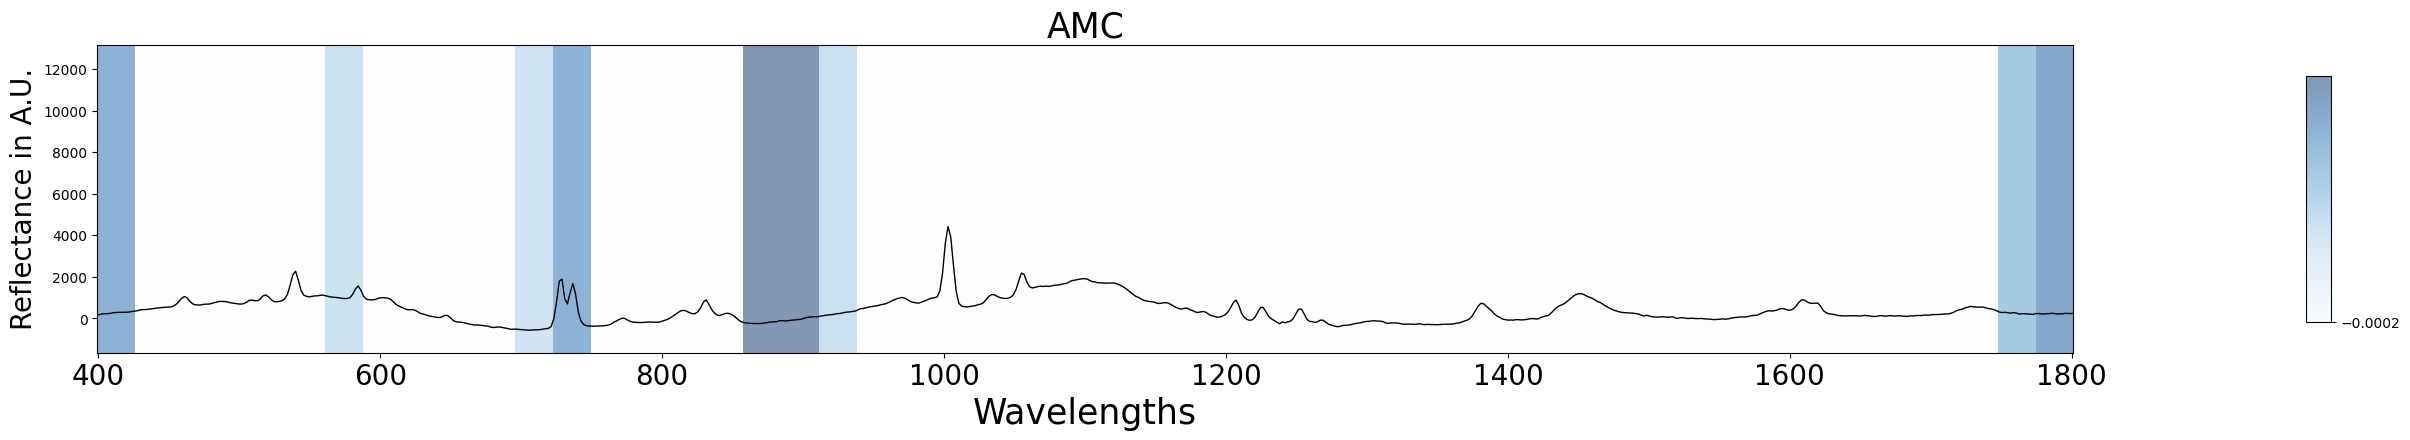

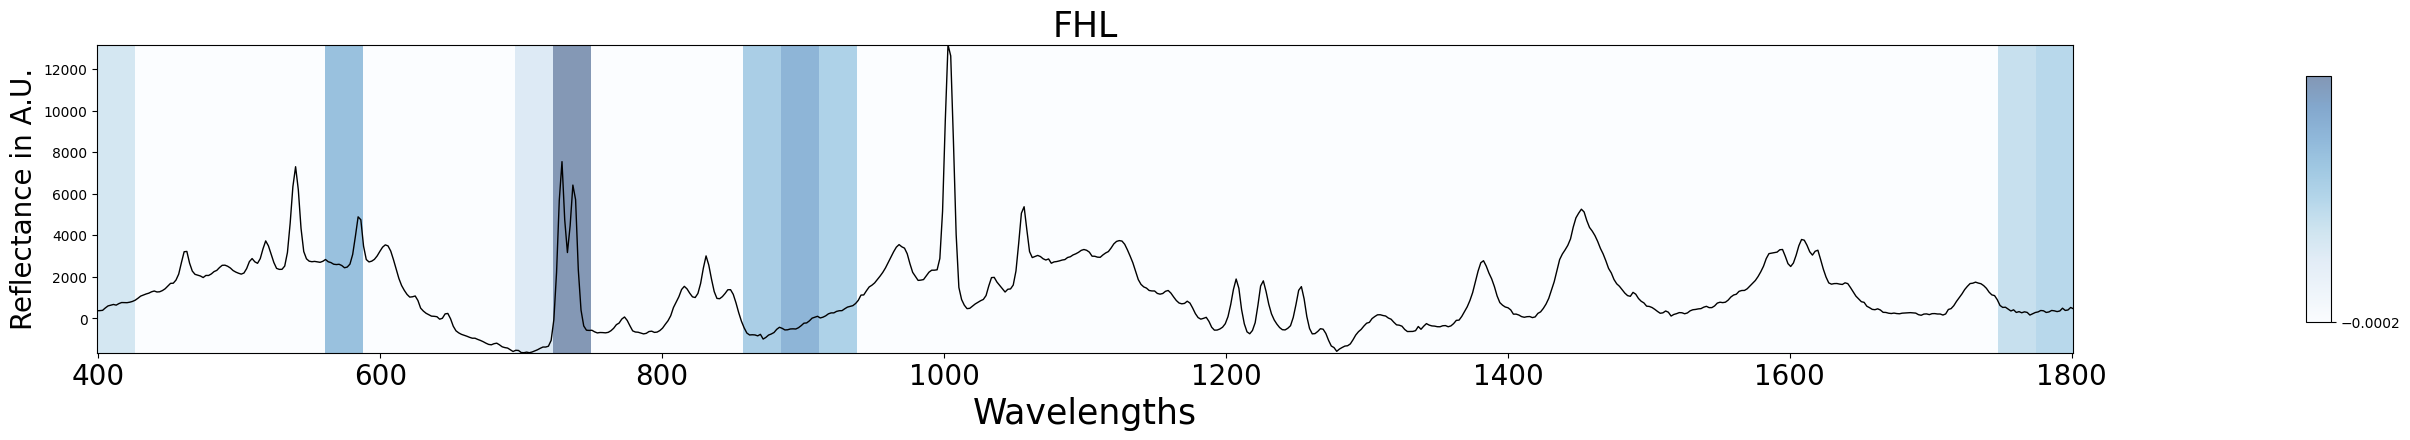

In [ ]:
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)
df_curv = df_curve.drop('outcome', axis = 1)
X_train = train_df.drop('outcome', axis = 1)

fin_heat = {}

full_df_col = [x for x in df_curve.columns]
feat_sel_col = [x for x in X_train.columns]

for key, value in instance_heatmap.items():
  kv = {}
  for val, col in zip(value, feat_sel_col):
    kv[col] = val
  fin_heat[key] = kv

fin = {}
for key, value in fin_heat.items():
  f = []
  for x in full_df_col:
    if x in value.keys():
      f.append(value[x])
      f.append(value[x])
    else:
      f.append(-0.0002)
  fin[key] = f

df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)


wave = df_curve.columns
w_names = [float(x) for x in wave[:-1]]

X = df_curve.drop('outcome', axis = 1)
y = df_curve['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 728)
y_pos = 728

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in fin.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 52))
    binned_heatmapdict[key] = mapped_mean

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-0.0002, 0.0003])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

#Transformer

In [ ]:
#Italian Dataset
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_Transformer_95.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_Transformer_95.csv')

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = train_df.drop(['outcome'], axis = 1)
y_train = train_df['outcome']

X_test = test_df.drop(['outcome'], axis = 1)
y_test = test_df['outcome']

In [ ]:

#Label-encode y
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import RandomOverSampler

#Label-encode y
le = preprocessing.LabelEncoder()
y_train_enc = le.fit_transform(y_train)
#One-hot encoding
y_train_list = []
for item in y_train_enc:
  zer = np.zeros(4)
  zer[item] = 1
  y_train_list.append(zer)

y_train = np.array(y_train_list)

#Label-encode y
y_test_enc = le.fit_transform(y_test)
#One-hot encoding
y_test_list = []
for item in y_test_enc:
  zer = np.zeros(4)
  zer[item] = 1
  y_test_list.append(zer)

y_test = np.array(y_test_list)
X_train = np.array(X_train)
X_train_3D = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_test = np.array(X_test)
X_test_3D = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
!pip install tensorflow_addons

In [ ]:
class ViTEmbeddings(tf.keras.layers.Layer):
    def __init__(self, patch_size, hidden_size, dropout=0.0, **kwargs):
        super().__init__(**kwargs)

        self.patch_size = patch_size
        self.hidden_size = hidden_size

        self.patch_embeddings = tf.keras.layers.Conv1D(filters=hidden_size, kernel_size=patch_size, strides=patch_size)
        self.dropout = tf.keras.layers.Dropout(rate=dropout)

    def build(self, input_shape):
        self.cls_token = self.add_weight(shape=(1, 1, self.hidden_size), trainable=True, name="cls_token")

        num_patches = input_shape[1] // self.patch_size
        self.position_embeddings = self.add_weight(
            shape=(1, num_patches + 1, self.hidden_size), trainable=True, name="position_embeddings"
        )

    def call(self, inputs: tf.Tensor, training: bool = False) -> tf.Tensor:
        inputs_shape = tf.shape(inputs)  # N,H,W,C
        embeddings = self.patch_embeddings(inputs, training=training)

        # add the [CLS] token to the embedded patch tokens
        cls_tokens = tf.repeat(self.cls_token, repeats=inputs_shape[0], axis=0)
        embeddings = tf.concat((cls_tokens, embeddings), axis=1)

        # add positional encoding to each token
        embeddings = embeddings + self.position_embeddings
        embeddings = self.dropout(embeddings, training=training)

        return embeddings
#Next is the MLP; nothing special here. It is the same as in the vit paper.

class MLP(tf.keras.layers.Layer):
    def __init__(self, mlp_dim, out_dim=None, activation="gelu", dropout=0.0, **kwargs):
        super().__init__(**kwargs)
        self.mlp_dim = mlp_dim
        self.out_dim = out_dim
        self.activation = activation
        self.dropout_rate = dropout

    def build(self, input_shape):
        self.dense1 = tf.keras.layers.Dense(self.mlp_dim)
        self.activation1 = tf.keras.layers.Activation(self.activation)
        self.dropout = tf.keras.layers.Dropout(self.dropout_rate)
        self.dense2 = tf.keras.layers.Dense(input_shape[-1] if self.out_dim is None else self.out_dim)

    def call(self, inputs: tf.Tensor, training: bool = False):
        x = self.dense1(inputs)
        x = self.activation1(x)
        x = self.dropout(x, training=training)
        x = self.dense2(x)
        x = self.dropout(x, training=training)
        return x

In [ ]:
class Block(tf.keras.layers.Layer):
    def __init__(
        self,
        num_heads,
        attention_dim,
        attention_bias,
        mlp_dim,
        attention_dropout=0.0,
        sd_survival_probability=1.0,
        activation="gelu",
        dropout=0.0,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.norm_before = tf.keras.layers.LayerNormalization()
        self.attn = tf.keras.layers.MultiHeadAttention(
            num_heads,
            attention_dim // num_heads,
            use_bias=attention_bias,
            dropout=attention_dropout,
        )
        self.stochastic_depth = tfa.layers.StochasticDepth(sd_survival_probability)
        self.norm_after = tf.keras.layers.LayerNormalization()
        self.mlp = MLP(mlp_dim=mlp_dim, activation=activation, dropout=dropout)

    def build(self, input_shape):
        super().build(input_shape)
        # TODO YONIGO: tf doc says to do this  ¯\_(ツ)_/¯
        self.attn._build_from_signature(input_shape, input_shape)

    def call(self, inputs, training=False):
        x = self.norm_before(inputs, training=training)
        x = self.attn(x, x, training=training)
        x = self.stochastic_depth([inputs, x], training=training)
        x2 = self.norm_after(x, training=training)
        x2 = self.mlp(x2, training=training)
        return self.stochastic_depth([x, x2], training=training)

    def get_attention_scores(self, inputs):
        x = self.norm_before(inputs, training=False)
        _, weights = self.attn(x, x, training=False, return_attention_scores=True)
        return weights

In [ ]:
class VisionTransformer(tf.keras.Model):
    def __init__(
        self,
        patch_size,
        hidden_size,
        depth,
        num_heads,
        mlp_dim,
        num_classes,
        dropout=0.1,
        sd_survival_probability=1.0,
        attention_bias=False,
        attention_dropout=0.0,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.embeddings = ViTEmbeddings(patch_size, hidden_size, dropout)
        sd = tf.linspace(1.0, sd_survival_probability, depth)
        self.blocks = [
            Block(
                num_heads,
                attention_dim=hidden_size,
                attention_bias=attention_bias,
                attention_dropout=attention_dropout,
                mlp_dim=mlp_dim,
                sd_survival_probability=(sd[i].numpy().item()),
                dropout=dropout,
            )
            for i in range(depth)
        ]

        self.norm = tf.keras.layers.LayerNormalization()

        self.head = tf.keras.layers.Dense(num_classes, activation = 'softmax')

    def call(self, inputs: tf.Tensor, training: bool = False) -> tf.Tensor:
        x = self.embeddings(inputs, training=training)
        for block in self.blocks:
            x = block(x, training=training)
        x = self.norm(x)
        x = x[:, 0]  # take only cls_token
        return self.head(x)

    def get_last_selfattention(self, inputs: tf.Tensor):
        x = self.embeddings(inputs, training=False)
        for block in self.blocks[:-1]:
            x = block(x, training=False)
        return self.blocks[-1].get_attention_scores(x)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lead_index = ['Class']


def plot_12(ecg, sampling_rate, plot_grid=True):
    "This function is ridiculously slow and there are mutch better ways to implemt"
    figsize = (25, 1.5 * 10)

    height_ratios = [ecg[:, i].max() - ecg[:, i].min() for i in range(12)]
    height_ratios = [i / height_ratios[0] for i in height_ratios]
    fig, axs = plt.subplots(12, 1, figsize=figsize, gridspec_kw={"height_ratios": height_ratios})
    fig.subplots_adjust(hspace=0.0)
    for i, ax in enumerate(axs):
        plot_ax(ax, ecg[:, i], sampling_rate, plot_grid=plot_grid)
        ax.set_ylabel(lead_index[i], fontsize=13)

    return fig, axs


def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

In [ ]:
vit85 = VisionTransformer(
        patch_size=15,
        hidden_size=16,
        depth=3,
        num_heads=3,
        mlp_dim=16,
        num_classes=4,
        sd_survival_probability=1.0,
    )

optimizer = tf.keras.optimizers.Adam(0.0001, use_ema = True, ema_momentum = 0.99)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.Accuracy()]
vit85.compile(optimizer=optimizer, loss=loss, metrics=metrics)

#cbs = [tf.keras.callbacks.ModelCheckpoint("vit_best/", monitor="val_roc_auc", save_best_only=True, save_weights_only=True)]

es = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 50)

history_transformer = vit85.fit(X_train_3D, y_train, validation_data = (X_test_3D, y_test), epochs=1000, callbacks = [es])

Epoch 1/1000
9/9 [==============================] - 10s 157ms/step - loss: 1.9351 - accuracy: 0.0000e+00 - val_loss: 1.9612 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 38ms/step - loss: 1.8875 - accuracy: 0.0000e+00 - val_loss: 1.7098 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 19ms/step - loss: 1.8902 - accuracy: 0.0000e+00 - val_loss: 1.5378 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 17ms/step - loss: 1.8107 - accuracy: 0.0000e+00 - val_loss: 1.4291 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 18ms/step - loss: 1.7440 - accuracy: 0.0000e+00 - val_loss: 1.3620 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 18ms/step - loss: 1.7545 - accuracy: 0.0000e+00 - val_loss: 1.3199 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 33ms/step - loss: 1.6340 - accuracy: 0.0000e+00 -

In [ ]:
def array_to_label(y):
  array_to_value = [y.tolist().index(1)]
  value_to_label = le.inverse_transform(np.array(array_to_value))
  return value_to_label[0]

fusion_method = 'max'
aggregated_dict = {}
aggregated_record = {}
for record, label in zip(X_test_3D, y_test):
  attn = vit85.get_last_selfattention(tf.expand_dims(record, 0))
  attn = attn[0, :, 0, 1:]  # cls_token attention with rest
  attn = tf.transpose(attn, (1, 0))
  attn = tf.expand_dims(tf.expand_dims(attn, 0), 0)
  attn = tf.image.resize(attn, (1, 54))[0, 0]
  #Fusing attention
  if fusion_method == "mean":
      attention_heads_fused = np.array(attn).mean(axis=1)
  elif fusion_method == "max":
      attention_heads_fused = np.array(attn).max(axis=1)
  elif fusion_method == "min":
      attention_heads_fused = np.array(attn).min(axis=1)

  true_class = array_to_label(label)
  if true_class in aggregated_dict.keys():
    aggregated_dict[true_class].append(attention_heads_fused)
  else:
    aggregated_dict[true_class] = [attention_heads_fused]

  if true_class in aggregated_record.keys():
    aggregated_record[true_class].append(record)
  else:
    aggregated_record[true_class] = [record]

In [ ]:
average_heatmap = {}
average_record = {}

for key, value in aggregated_dict.items():
  av = np.mean(aggregated_dict[key], axis = 0)
  average_heatmap[key] = av

for key, value in aggregated_record.items():
  av = np.mean(aggregated_record[key], axis = 0)
  average_record[key] = av

In [ ]:
#Get heatmap for example instance
ins_EC = aggregated_dict['EC'][0]
ins_CSG1 = aggregated_dict['CSG1'][0]
ins_CSG2 = aggregated_dict['CSG2'][0]
ins_CSG3 = aggregated_dict['CSG3'][0]

In [ ]:
instance_heatmap = {}
instance_heatmap['EC'] = ins_AMC
instance_heatmap['CSG1'] = ins_CSG1
instance_heatmap['CSG2'] = ins_CSG2
instance_heatmap['CSG3'] = ins_CSG3

ins = pd.DataFrame(instance_heatmap)

ins.to_csv('Transformer_Instance_Heatmap_95_Italian.csv')

In [ ]:
df_curve = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_data_Italian.csv', index_col = 0)
df_curv = df_curve.drop('outcome', axis = 1)
X_train = train_df.drop('outcome', axis = 1)

fin_heat = {}

full_df_col = [x for x in df_curve.columns]
feat_sel_col = [x for x in X_train.columns]

for key, value in ins.items():
  kv = {}
  for val, col in zip(value, feat_sel_col):
    kv[col] = val
  fin_heat[key] = kv

fin = {}
for key, value in fin_heat.items():
  f = []
  for x in full_df_col:
    if x in value.keys():
      f.append(value[x])
      f.append(value[x])
    else:
      f.append(0)
  fin[key] = f

In [ ]:
wave = df_curve.columns
w_names = [float(x) for x in wave[:-1]]

X = df_curve.drop('outcome', axis = 1)
y = df_curve['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 729)
y_pos = 729

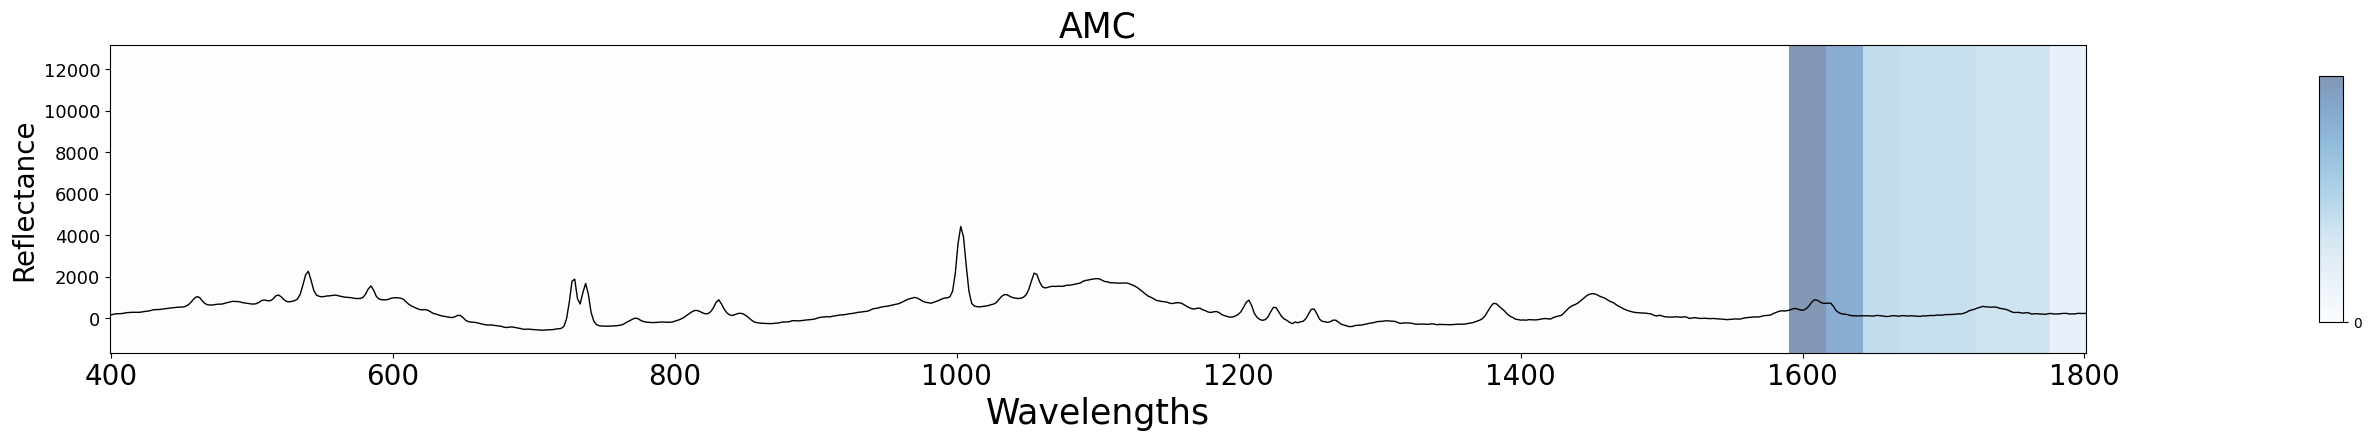

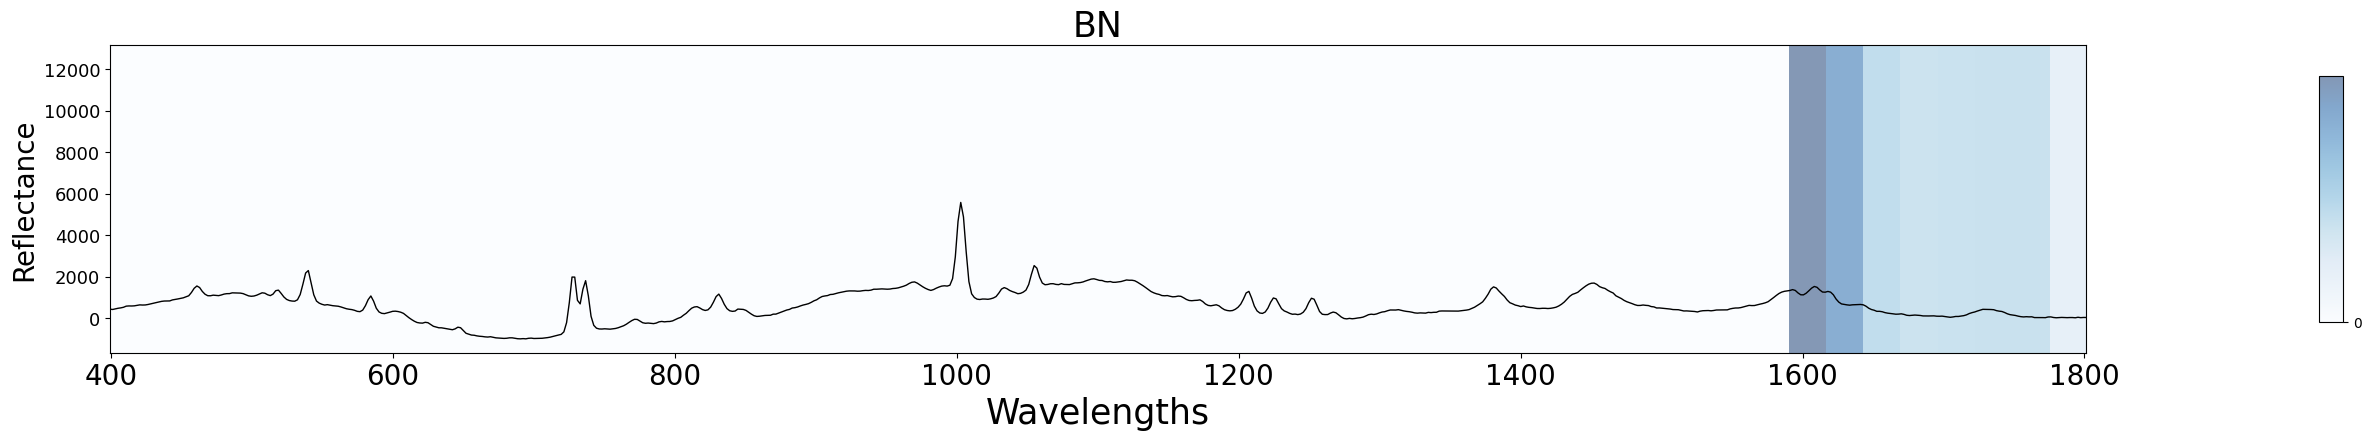

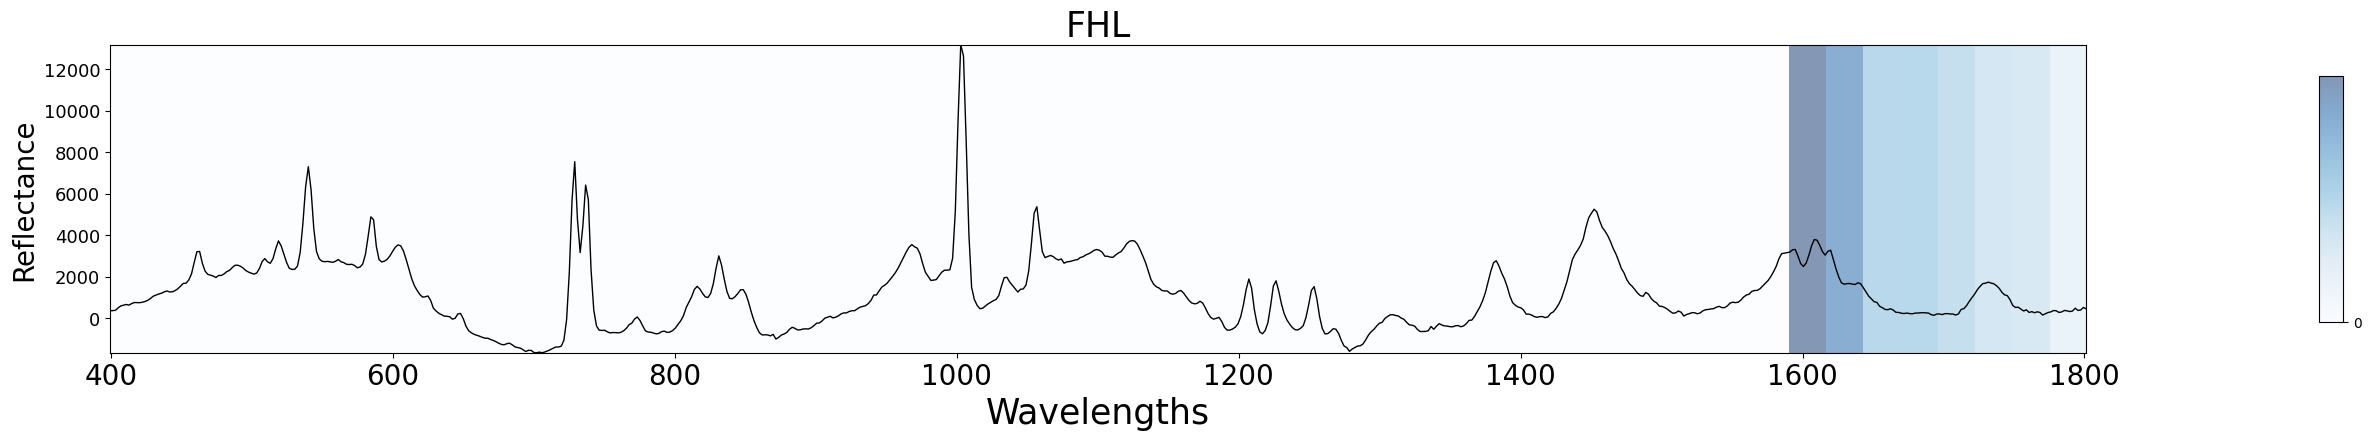

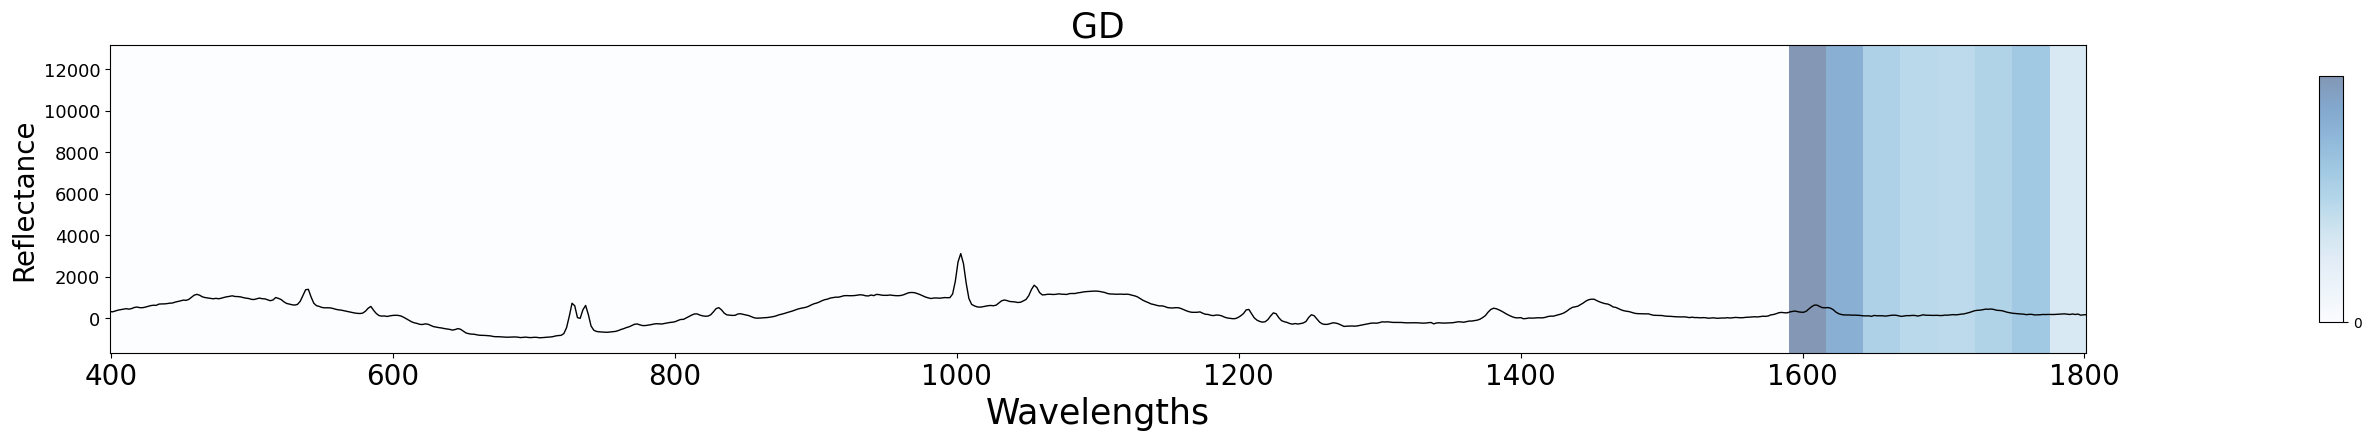

In [ ]:
binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in fin.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 53))
    binned_heatmapdict[key] = mapped_mean

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  plt.tick_params(axis='y', labelsize=13)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[0, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

#Random Forest

In [ ]:
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_RF_95.csv', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Testing_RF_95.csv', index_col = 0)

dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
train_df = train_df.replace({"outcome": dic})
test_df = test_df.replace({"outcome": dic})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = train_df.drop(['outcome'], axis = 1)
y_train = train_df['outcome']
X_test = test_df.drop(['outcome'], axis = 1)
y_test = test_df['outcome']

In [ ]:
tree80 = RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree80.fit(X_train, y_train)
pred = tree80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

0.9705882352941176


In [ ]:
classes = tree80.classes_
coefficients = tree80.feature_importances_

def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X_train, y_train, coefficients)

coef_df = pd.DataFrame(result)
coef_df.set_index(X_test.columns, inplace = True)

scaler = preprocessing.MinMaxScaler()
coef_df =  pd.DataFrame(scaler.fit_transform(coef_df), index = X_test.columns, columns = result.keys())

full_df = pd.read_csv('/content/drive/MyDrive/Thesis/Validation Data Italian/Training_data_Italian.csv', index_col = 0)
dic = {"FHL" : 'EC', "AMC" : 'CSG1', "BN": 'CSG2', "GD" : 'CSG3'}
full_df = full_df.replace({"outcome": dic})
all_cols = list(full_df.columns[:-1].values)

EC = {}
CSG1 = {}
CSG2 = {}
CSG3 = {}

for item in all_cols:
  if item in coef_df.index:
    EC[item] = coef_df['EC'][item]
    CSG1[item] = coef_df['CSG1'][item]
    CSG2[item] = coef_df['CSG2'][item]
    CSG3[item] = coef_df['CSG3'][item]
  else:
    EC[item] = 0
    CSG1[item] = 0
    CSG2[item] = 0
    CSG3[item] = 0

f = {'EC' : EC, 'CSG1' : CSG1, 'CSG2' : CSG2, 'CSG3' : CSG3}

final = pd.DataFrame(f, index = full_df.columns[:-1], columns = f.keys())

r = 729
wave = full_df.columns
w_names = [float(x) for x in wave[:-1]]

X = full_df.drop(['outcome'], axis = 1)
y = full_df['outcome']

i_dict = {}
X_ar = np.array(X)
for clas, i in zip(y, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

scaled_average_i = {}
for key, value in average_i.items():
  mi = min(value)
  ma = max(value)
  di = ma - mi
  scaled_average_i[key] = [x / di for x in value]

total_i = np.mean(np.array(list(scaled_average_i.values())), axis = 0)
scaled_average_i['total'] = total_i
bars = range(0, r)
y_pos = r

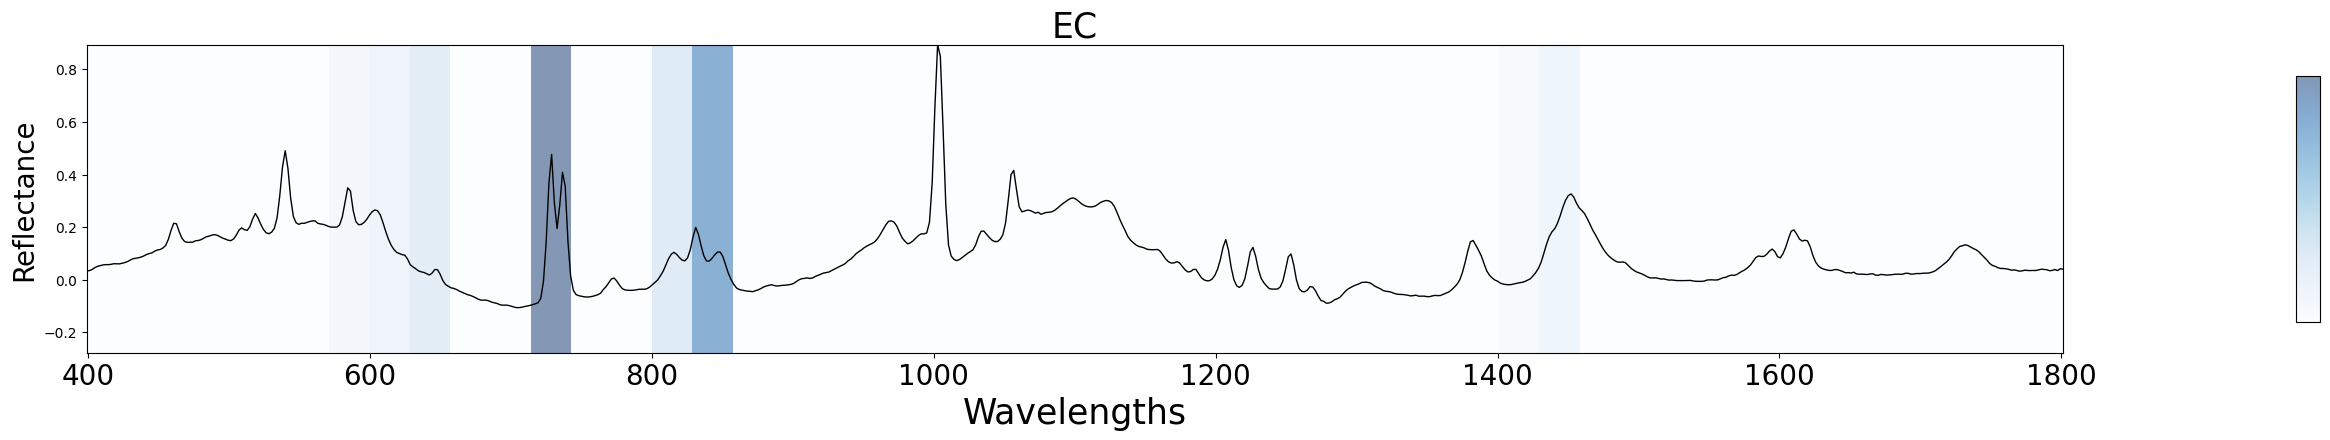

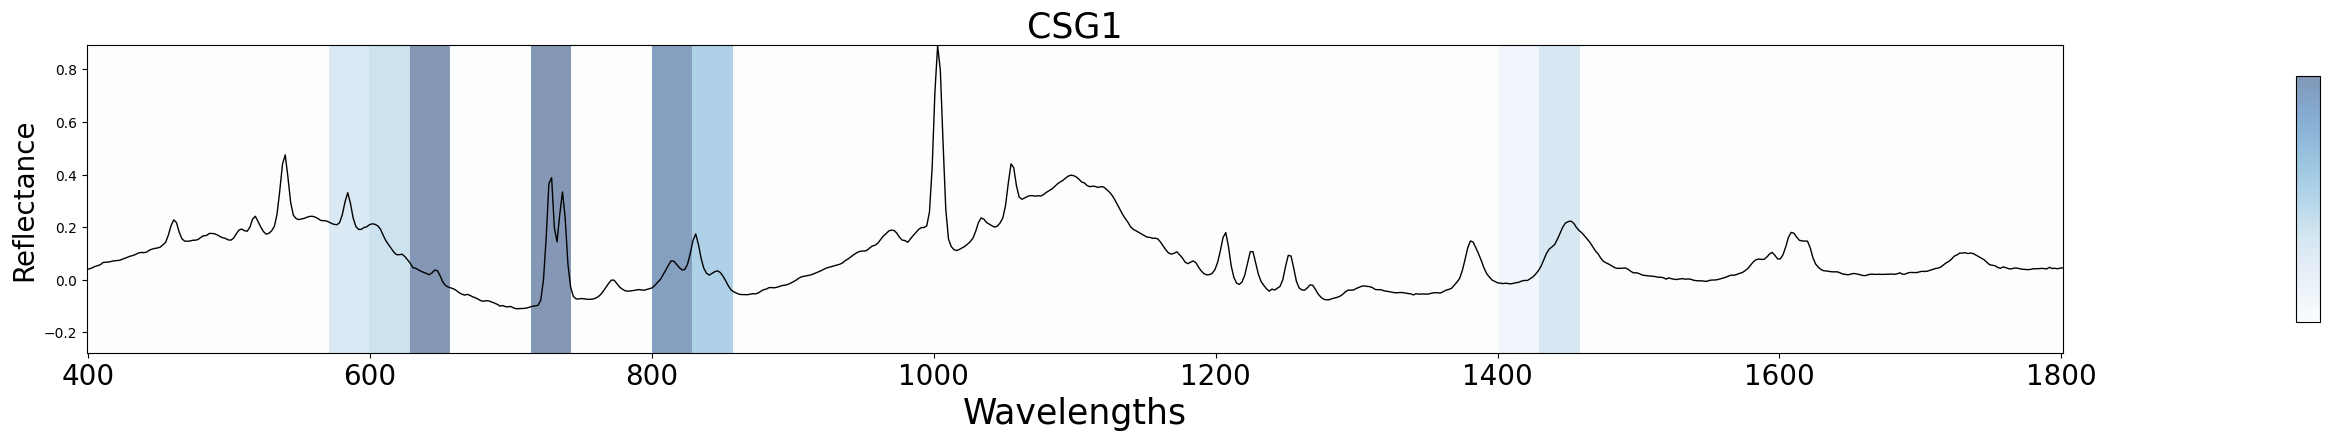

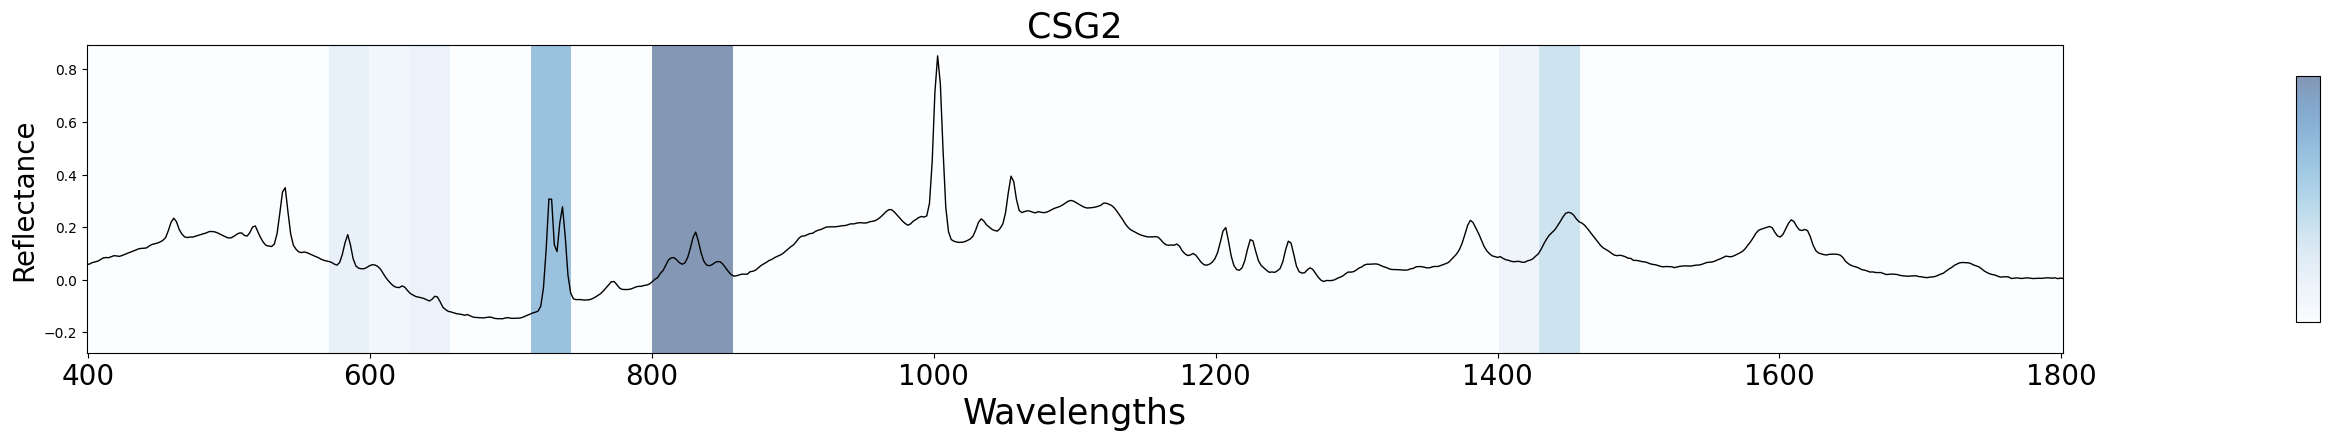

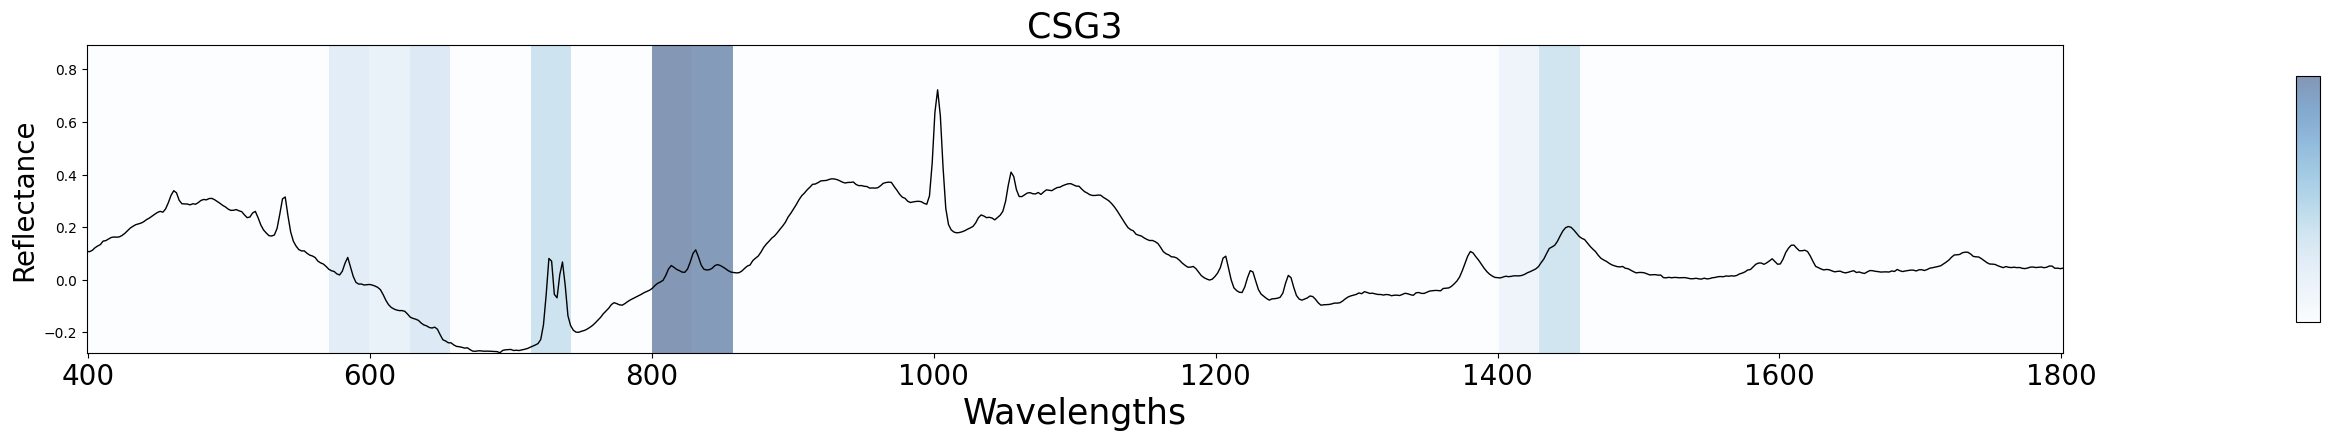

In [ ]:
fin = {'EC' : list(EC.values()), 'CSG1' : list(CSG1.values()), 'CSG2' : list(CSG2.values()), 'CSG3' : list(CSG3.values())}
binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in fin.items():
    mapped = [value[x:x+15] for x in range(0, len(value), 15)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 49))
    binned_heatmapdict[key] = mapped_mean.tolist()[0]


fmin = []
fmax = []
for key, value in binned_heatmapdict.items():
  fmin.append(min(value))
  fmax.append(max(value))


#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in scaled_average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

wave = X.columns
w_names = [float(x) for x in wave]

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, scaled_average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()